# Code for the data anlaysis of the paper: "Machine Learning Models Predict the Emergence of Depression in Argentinean College Students during Periods of COVID-19 Quarantine":

# Part 2:  Regression task

"Machine Learning Models Predict the Emergence of Depression in Argentinean College Students during Periods of COVID-19 Quarantine"

Lorena Cecilia López Steinmetz1,2*, Margarita Sison3†, Rustam Zhumagambetov4†, Juan Carlos Godoy2, Stefan Haufe1,3,4,5*

Affiliations:

1 Technische Universität Berlin, Faculty IV Electrical Engineering and Computer Science, Institute of Software Engineering and Theoretical Computer Science, Chair of Uncertainty, Inverse Modeling and Machine Learning, Berlin, Germany

2 Universidad Nacional de Córdoba (UNC), Consejo Nacional de Investigaciones Científicas y Técnicas (CONICET), Facultad de Psicología, Instituto de Investigaciones Psicológicas (IIPsi), Córdoba, Argentina

3 Charité – Universitätsmedizin Berlin, Berlin Center for Advanced Neuroimaging (BCAN), Berlin, Germany

4 Physikalisch-Technische Bundesanstalt Braunschweig und Berlin, Mathematical Modelling and Data Analysis Department, Working Group 8.44 Machine Learning and Uncertainty, Berlin, Germany 

5 Charité – Universitätsmedizin Berlin, Institute for Medical Informatics, Berlin, Germany

† These authors contributed equally to this work



**Part 2:  Regression task**

This Jupyter notebook outlines the data analysis process used in our paper López Steinemtz et al. "Machine Learning Models Predict the Emergence of Depression in Argentinean College Students during Periods of COVID-19 Quarantine" to predict depression scores in college students, utilizing ridge regression, random forest, and support vector machine (SVM) models. We use scores from the Beck Depression Inventory as the outcome variable. We include psychological inventory scores (depression at T1 and anxiety-trait at T1), basic clinical information (mental disorder history, suicidal behavior history), quarantine sub-periods (first, second, third), and demographics (sex, age) as features.

We evaluate the models' performance using various metrics, including, R2 score, mean squared error (MSE), and mean absolute error (MAE), and compare them to three dummy/baseline classifiers (randomly shuffled baseline, mean baseline, and median baseline).

We evaluate multivariate models and univariate models. 

The dataset analyzed here is from a study published in the following paper:

- López Steinmetz LC, Godoy JC, Fong SB. A longitudinal study on depression and anxiety in college students during the first 106-days of the lengthy Argentinean quarantine for the COVID-19 pandemic.  Ment Health. 2023 Dec;32(6):1030-1039. doi: https://doi.org/10.1080/09638237.2021.1952952. Epub 2021 Jul 24. PMID: 34304678.

The data collection procedure and sample description are available in that published paper (López Steinmetz et al., 2021).

The complete dataset is available in the Open Science Framework (OSF) repository: https://doi.org/10.17605/OSF.IO/2V84N.

In [131]:
# Load 'dataset.xlsx' file

import pandas as pd

# data = pd.read_excel("YOUR_PATH/dataset.xlsx", sheet_name=0, header=0)

## Data preprocessing

In [132]:
data

,participant,ADEPRESSION,BDEPRESSION,AANXIETY,BANXIETY,quarantinesubperiod,sex,age,mentdishist,suic
0,1,13,1,33,21,quar first,woman,22,no,no
1,2,16,11,21,14,quar first,woman,24,no,yes
2,3,5,11,20,23,quar first,woman,30,no,yes
3,4,28,24,41,41,quar first,woman,22,yes,yes
4,5,17,17,37,35,quar first,woman,25,no,yes
...,...,...,...,...,...,...,...,...,...,...
1487,1488,9,14,26,29,quar first,woman,29,yes,no
1488,1489,52,45,49,51,quar second,woman,18,yes,yes
1489,1490,25,19,40,36,quar third,woman,20,no,no
1490,1491,27,40,36,43,quar third,man,31,yes,yes


participant: index of each participant

ADEPRESSION: measurement of depression at time 1

BDEPRESSION: measurement of depression at time 2 (follow-up)

AANXIETY: measurement of anxiety at time 1

BANXIETY: measurement of anxiety at time 2 (follow-up)

sex: sex

age: age

mentdishist: mental disorder history

suic: suicidal behavior history

In [133]:
# Drop columns 'participant' and 'BANXIETY'
data = data.drop(['participant', 'BANXIETY'], axis=1)
# 'participant' and 'BANXIETY' will not be used in the analysis

### **Convert categorical variables into dummy variables**


In [134]:
# Convert categorical variables:'quarantinesubperiod', 'sex', 'mentdishist', and 'suic' into dummy variables
print("Columns before 'get_dummies' conversion:\n{}".format(list(data.columns)))

data = pd.get_dummies(data)
print("Columns after 'get_dummies' conversion:\n{}".format(list(data.columns)))

Columns before 'get_dummies' conversion:
['ADEPRESSION', 'BDEPRESSION', 'AANXIETY', 'quarantinesubperiod', 'sex', 'age', 'mentdishist', 'suic']
Columns after 'get_dummies' conversion:
['ADEPRESSION', 'BDEPRESSION', 'AANXIETY', 'age', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes']


In [135]:
data

,ADEPRESSION,BDEPRESSION,AANXIETY,age,quarantinesubperiod_quar first,quarantinesubperiod_quar second,quarantinesubperiod_quar third,sex_man,sex_woman,mentdishist_no,mentdishist_yes,suic_no,suic_yes
0,13,1,33,22,True,False,False,False,True,True,False,True,False
1,16,11,21,24,True,False,False,False,True,True,False,False,True
2,5,11,20,30,True,False,False,False,True,True,False,False,True
3,28,24,41,22,True,False,False,False,True,False,True,False,True
4,17,17,37,25,True,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,9,14,26,29,True,False,False,False,True,False,True,True,False
1488,52,45,49,18,False,True,False,False,True,False,True,False,True
1489,25,19,40,20,False,False,True,False,True,True,False,True,False
1490,27,40,36,31,False,False,True,True,False,False,True,False,True


### **Assign input features to 'X' and target to 'y'**

In [136]:
# Convert 'data' DataFrame into a NumPy array to make it compatible with scikit-learn functions
import numpy as np

data = np.array(data)

In [138]:
# Assign features to 'X' and target to 'y'
X = data[:, [0] + list(range(2, data.shape[1]))] # 'ADEPRESSION', 'AANXIETY', 'age', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes'
y = data[:, 1:2] # 'BDEPRESSION'

In [139]:
# Check 'X' and 'y':
print(X[0:5], X.shape)
print(y[0:5], y.shape)

[[13 33 22 True False False False True True False True False]
 [16 21 24 True False False False True True False False True]
 [5 20 30 True False False False True True False False True]
 [28 41 22 True False False False True False True False True]
 [17 37 25 True False False False True True False False True]] (1492, 12)
[[1]
 [11]
 [11]
 [24]
 [17]] (1492, 1)


In [140]:
# Convert boolean columns to integers
X = X.astype(int)
y = y.astype(int)

# Check 'X_train' and 'X_test':
print(X[0:5], X.shape)
print(y[0:5], y.shape)

[[13 33 22  1  0  0  0  1  1  0  1  0]
 [16 21 24  1  0  0  0  1  1  0  0  1]
 [ 5 20 30  1  0  0  0  1  1  0  0  1]
 [28 41 22  1  0  0  0  1  0  1  0  1]
 [17 37 25  1  0  0  0  1  1  0  0  1]] (1492, 12)
[[ 1]
 [11]
 [11]
 [24]
 [17]] (1492, 1)


### **Split 'X' and 'y' into a training set and a test set**

In [141]:
# Split 'X' and 'y' into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0)

In [142]:
# Check training and test set dimensions (i.e., shape):
print(X_train.shape, y_train.shape) # (1119, 12) (1119, 1)
print(X_test.shape, y_test.shape) # (373, 12) (373, 1)

(1119, 12) (1119, 1)
(373, 12) (373, 1)


### **Assign the input features that will be scaled to 'scaled_X_train' and 'scaled_X_test'**

In [143]:
# Assign the features that will be scaled to 'scaled_X_train' and 'scaled_X_test'
scaled_X_train = X_train[:, :3] # 'ADEPRESSION', 'AANXIETY', 'age'
scaled_X_test = X_test[:, :3] # 'ADEPRESSION', 'AANXIETY', 'age'

In [144]:
# Check 'scaled_X_train' and 'scaled_X_test':
print(scaled_X_train[0:5], scaled_X_train.shape)
print(scaled_X_test[0:5], scaled_X_test.shape)

[[20 34 18]
 [ 7 14 25]
 [30 31 18]
 [38 32 23]
 [20 28 25]] (1119, 3)
[[36 40 19]
 [ 6 17 20]
 [28 38 25]
 [11 12 25]
 [27 34 33]] (373, 3)


### **Transform features using quantiles information**



In [145]:
# Scale 'ADEPRESSION', 'AANXIETY' and 'age'
from sklearn.preprocessing import QuantileTransformer # QuantileTransformer: Transform features using quantiles information.

qt_norm = QuantileTransformer(output_distribution='normal').fit(scaled_X_train)  # output_distribution{‘uniform’, ‘normal’}, default='uniform’: Marginal distribution for the transformed data. The choices are ‘uniform’ (default) or ‘normal’.

scaled_X_train = qt_norm.transform(scaled_X_train)  # Method: transform(X) Feature-wise transformation of the data.
scaled_X_test = qt_norm.transform(scaled_X_test)

In [146]:
# Check 'scaled_X_train' and 'scaled_X_test':
print(scaled_X_train[0:5], scaled_X_train.shape)
print(scaled_X_test[0:5], scaled_X_test.shape)

[[ 0.2200582   0.2406714  -1.77392186]
 [-1.17940175 -1.36525737  0.74635093]
 [ 0.90330062  0.02007445 -1.77392186]
 [ 1.4568958   0.09549215  0.2239158 ]
 [ 0.2200582  -0.18931001  0.74635093]] (1119, 3)
[[ 1.3041214   0.72987685 -1.17188995]
 [-1.33101771 -1.06188413 -0.74800946]
 [ 0.77822491  0.53653104  0.74635093]
 [-0.62414474 -1.60221032  0.74635093]
 [ 0.71359852  0.2406714   1.56698962]] (373, 3)


### **Dimensionality reduction using PCA**

In [147]:
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=.95).fit(scaled_X_train)

PCA_scaled_X_train = pca.transform(scaled_X_train)
PCA_scaled_X_test = pca.transform(scaled_X_test)

Here, n_components=.95 means that PCA will retain the number of components that capture 95% of the variance in the original data. The PCA object has a n_components_ attribute that will give us the actual number of components that were retained based on the specified explained variance ratio.

We can access this information after fitting the PCA model using:

In [148]:
n_components_retained = pca.n_components_
print("Number of components retained:", n_components_retained)

Number of components retained: 3


In [149]:
# Check 'scaled_X_train' and 'scaled_X_test':
print(PCA_scaled_X_train[0:5], PCA_scaled_X_train.shape)
print(PCA_scaled_X_test[0:5], PCA_scaled_X_test.shape)

[[-0.79357515  1.60327554 -0.00416553]
 [ 1.92774393 -0.25404828  0.1803366 ]
 [-1.12352086  1.50652814  0.62611931]
 [-1.0216311  -0.54173478  0.93876647]
 [ 0.17075263 -0.74617141  0.29050365]] (1119, 3)
[[-1.71235455  0.7184453   0.38297432]
 [ 1.42952851  1.16058793 -0.13386313]
 [-0.70059385 -0.98883075  0.14814126]
 [ 1.69791379 -0.32225688  0.73439683]
 [-0.23801006 -1.71278189  0.31266591]] (373, 3)


### **Drop unscaled features from 'X_train' and 'X_test'**

In [150]:
# 'PCA_scaled_X_train' and 'PCA_scaled_X_test' contain the scaled features: 'ADEPRESSION', 'AANXIETY', 'age'
# 'X_train' and 'X_test' also contain those features, but unscaled

# Drop unscaled features from 'X_train' and 'X_test'
X_train = np.delete(X_train, [0, 1, 2], axis=1)  # unscaled are: 'ADEPRESSION', 'AANXIETY', 'age'. Keep the categorical dummy variables: 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes'
X_test = np.delete(X_test, [0, 1, 2], axis=1)  # delete the columns with indices 0, 1, 2 #  The axis=1 argument indicates that the operation is to be performed along the columns.

In [151]:
# Check 'X_train' and 'X_test':
print(X_train[0:5], X_train.shape)
print(X_test[0:5], X_test.shape)

[[0 0 1 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]] (1119, 9)
[[0 0 1 0 1 1 0 1 0]
 [0 0 1 0 1 1 0 1 0]
 [1 0 0 0 1 0 1 0 1]
 [1 0 0 0 1 1 0 1 0]
 [1 0 0 0 1 0 1 1 0]] (373, 9)


### **Concatenate scaled features and dummy variables**

In [152]:
# Concatenate scaled features (contained, e.g., in 'PCA_scaled_X_train') and dummy variables (containded, e.g.,in 'X_train')

import numpy as np

X_train = np.concatenate([PCA_scaled_X_train, X_train], axis=1)
X_test = np.concatenate([PCA_scaled_X_test, X_test], axis=1)

In [153]:
# Check 'X_train' and 'X_test':
print(X_train[0:5], X_train.shape)
print(X_test[0:5], X_test.shape)

[[-0.79357515  1.60327554 -0.00416553  0.          0.          1.
   0.          1.          1.          0.          0.          1.        ]
 [ 1.92774393 -0.25404828  0.1803366   1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [-1.12352086  1.50652814  0.62611931  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [-1.0216311  -0.54173478  0.93876647  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [ 0.17075263 -0.74617141  0.29050365  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]] (1119, 12)
[[-1.71235455  0.7184453   0.38297432  0.          0.          1.
   0.          1.          1.          0.          1.          0.        ]
 [ 1.42952851  1.16058793 -0.13386313  0.          0.          1.
   0.          1.          1.          0.          1.          0.        ]
 

### **Scale 'y': Quantile transformation**

In [154]:
# SCALE 'y'
qt_norm = QuantileTransformer(output_distribution='normal').fit(y_train)

y_train = qt_norm.transform(y_train)
y_test = qt_norm.transform(y_test)

In [155]:
# Check 'y_train' and 'y_test':
print(y_train[0:5], y_train.shape)
print(y_test[0:5], y_test.shape)

[[-1.1473155 ]
 [ 0.45146888]
 [ 0.2200582 ]
 [-0.300542  ]
 [ 0.30448193]] (1119, 1)
[[ 0.05271629]
 [-1.1473155 ]
 [ 1.19462844]
 [-1.1473155 ]
 [ 0.81265408]] (373, 1)


**Set high DPI as default for all figures**

In [156]:
## Set high DPI as default for all figures
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

## **Training models**

### **Dummy regressors (baselines)**

**Dummy regressors**  

For the **REGRESSION** task, the following models will be added:

- **randomly shuffled baseline**;

- **mean baseline**;

- **median baseline**.


<br>


### **Performance metrics**


- **R2** (*A value of 1 indicates that the model fits the data perfectly and a value of 0 indicates that the model does not fit the data at all*).

- **Mean Absolute Error (MAE)** (*A lower value of mean absolute error indicates better performance of the model*).

- **Mean Squared Error (MSE)** (*The smaller the mean squared error, the better the regression model is performing*).

<br>

- **BASELINE 1 OF 3: RANDOMLY SHUFFLED BASELINE**

In [157]:
### MAKE DUMMY REGRESSORS (BASELINES)
from sklearn.dummy import DummyRegressor # DummyRegressor(strategy=['mean', 'median'], constant=None, quantile=None)
from sklearn.utils import resample # For bootstrapping 'y_test' with replacement # resample(arrays, replace=True, n_samples=None, random_state=None, stratify=None)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Performance metrics

### BASELINE 1 OF 3: RANDOMLY SHUFFLED BASELINE
y_test_shuffled = np.copy(y_test)  # create a shuffled copy of the original y_test array

# create empty lists that will store tthe R-squared score, mean absolute error, and mean squared error for each iteration of the bootstrap
r2_rand = []
mae_rand = []
mse_rand = []

# set a random seed for reproducibility
np.random.seed(0)

# the for loop runs 100 times and in each iteration, it creates a new bootstrapped sample of the test data with replacement
for i in range(100):
    X_test_resampled_rand, y_test_resampled_rand = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)

    # shuffle the shuffled copy of y_test with the same random seed
    y_test_shuffled = np.copy(y_test)
    np.random.shuffle(y_test_shuffled)  # shuffle the shuffled copy of y_test, to create a randomly shuffled version of the target variable

    r2_rand.append(r2_score(y_test_resampled_rand, y_test_shuffled)) # r2_score(y_true, y_pred)  # r2_score function computes the respective score for the bootstrapped test data and shuffled target variable, and append them to the corresponding list
    mae_rand.append(mean_absolute_error(y_test_resampled_rand, y_test_shuffled)) # mean_absolute_error(y_true, y_pred)  # mean_absolute_error function computes the respective score for the bootstrapped test data and shuffled target variable, and append them to the corresponding list
    mse_rand.append(mean_squared_error(y_test_resampled_rand, y_test_shuffled)) # mean_squared_error(y_true, y_pred)  # mean_squared_error function computes the respective score for the bootstrapped test data and shuffled target variable, and append them to the corresponding list

print("Mean scores for randomly shuffled baseline with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_rand), np.percentile(r2_rand, 2.5), np.percentile(r2_rand, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_rand), np.percentile(mae_rand, 2.5), np.percentile(mae_rand, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_rand), np.percentile(mse_rand, 2.5), np.percentile(mse_rand, 97.5)))

Mean scores for randomly shuffled baseline with 95% confidence intervals:
    R2 score: -1.02 [-1.33, -0.78]
    Mean absolute error: 1.08 [1.01, 1.17]
    Mean squared error: 1.85 [1.65, 2.13]


- **BASELINE 2 OF 3: MEAN BASELINE**

In [158]:
### BASELINE 2 OF 3: MEAN BASELINE
# define a dummy regressor with a 'mean' strategy
mean_regr = DummyRegressor(strategy='mean')

# fit the dummy regressor on the training set
mean_regr = mean_regr.fit(X_train, y_train)

# create three empty lists to store the R2 score, MAE, and MSE for each resampling of the test set
r2_mean = []
mae_mean = []
mse_mean = []

# set a random seed for reproducibility
np.random.seed(0) 

# the for loop runs 100 times and in each iteration, it creates a new bootstrapped sample of the test data with replacement
for i in range(100):
    X_test_resampled_mean, y_test_resampled_mean = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_pred_mean = mean_regr.predict(X_test_resampled_mean)  # make predictions on the resampled test set
    r2_mean.append(r2_score(y_test_resampled_mean, y_pred_mean))  # calculate the R2 score between the predicted values and the true target values
    mae_mean.append(mean_absolute_error(y_test_resampled_mean, y_pred_mean))  # calculate the MAE between the predicted values and the true target values
    mse_mean.append(mean_squared_error(y_test_resampled_mean, y_pred_mean))  # calculate the MSE between the predicted values and the true target values

print("Mean scores for mean baseline with 95% confidence intervals:")
print("    R2 score: {:.3f} [{:.2f}, {:.5f}]".format(np.mean(r2_mean), np.percentile(r2_mean, 2.5), np.percentile(r2_mean, 97.5)))  # I set to 3 and 5 decimal points, otherwise we see -0.00
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_mean), np.percentile(mae_mean, 2.5), np.percentile(mae_mean, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_mean), np.percentile(mse_mean, 2.5), np.percentile(mse_mean, 97.5)))

Mean scores for mean baseline with 95% confidence intervals:
    R2 score: -0.003 [-0.01, -0.00001]
    Mean absolute error: 0.78 [0.72, 0.85]
    Mean squared error: 0.92 [0.77, 1.10]


- **BASELINE 3 OF 3: MEDIAN BASELINE**

In [159]:
### BASELINE 3 OF 3: MEDIAN BASELINE
median_regr = DummyRegressor(strategy='median')  # create a dummy regressor object that will predict the median value of the target variable for any input data point

# fit the median regressor model to the training data
median_regr = median_regr.fit(X_train, y_train)

# create three empty lists to store the R2 score, MAE, and MSE for each resampling of the test set
r2_median = []
mae_median = []
mse_median = []

# set a random seed for reproducibility
np.random.seed(0) 

# the for loop runs 100 times and in each iteration, it creates a new bootstrapped sample of the test data with replacement
for i in range(100):
    X_test_resampled_median, y_test_resampled_median = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_pred_median = median_regr.predict(X_test_resampled_median)  # the predict method generates the median predictions for the resampled test data
    r2_median.append(r2_score(y_test_resampled_median, y_pred_median))
    mae_median.append(mean_absolute_error(y_test_resampled_median, y_pred_median))
    mse_median.append(mean_squared_error(y_test_resampled_median, y_pred_median))

print("Mean scores for median baseline with 95% confidence intervals:")
print("    R2 score: {:.3f} [{:.2f}, {:.5f}]".format(np.mean(r2_median), np.percentile(r2_median, 2.5), np.percentile(r2_median, 97.5)))  # I set to 3 and 5 decimal points, otherwise we see -0.00
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_median), np.percentile(mae_median, 2.5), np.percentile(mae_median, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_median), np.percentile(mse_median, 2.5), np.percentile(mse_median, 97.5)))

Mean scores for median baseline with 95% confidence intervals:
    R2 score: -0.003 [-0.01, -0.00002]
    Mean absolute error: 0.78 [0.72, 0.85]
    Mean squared error: 0.92 [0.77, 1.10]


## **RIDGE REGRESSION**

In [30]:
### RIDGE REGRESSION
# GRID SEARCH WITH STRATIFIED 10-FOLD CROSS-VALIDATION

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

# Ridge Regression
p_grid_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gs_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=p_grid_ridge,
    scoring='r2',
    n_jobs=-1,
    refit=True,
    cv=KFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True
)

gs_ridge.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='r2')

In [31]:
# Save the trained model to a file
import joblib

joblib.dump(gs_ridge, 'gs_ridge.pkl') 

['gs_ridge.pkl']

In [32]:
# Load the saved model
import joblib

gs_ridge = joblib.load('gs_ridge.pkl')

In [33]:
# Access the best parameters and the best model
best_alpha = gs_ridge.best_params_['alpha']
best_model_ridge = gs_ridge.best_estimator_
best_alpha
best_model_ridge

Ridge(alpha=100)

In [35]:
# Use the loaded model for predictions
# predictions = gs_ridge.predict(X_test)
# predictions

In [36]:
pd.DataFrame(gs_ridge.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010200,0.004752,0.001101,0.000300,0.0001,{'alpha': 0.0001},0.415453,0.647980,0.421700,0.510546,...,0.545255,0.538291,0.541011,0.530694,0.542673,0.548231,0.513311,0.542037,0.537699,0.010632
1,0.002001,0.001415,0.001000,0.000002,0.001,{'alpha': 0.001},0.415453,0.647980,0.421701,0.510547,...,0.545255,0.538291,0.541011,0.530694,0.542673,0.548231,0.513311,0.542037,0.537699,0.010632
2,0.001800,0.000400,0.001000,0.000447,0.01,{'alpha': 0.01},0.415456,0.647980,0.421702,0.510549,...,0.545255,0.538291,0.541011,0.530694,0.542673,0.548231,0.513311,0.542037,0.537699,0.010632
3,0.002004,0.000391,0.000900,0.000300,0.1,{'alpha': 0.1},0.415483,0.647975,0.421716,0.510569,...,0.545255,0.538291,0.541011,0.530694,0.542673,0.548231,0.513311,0.542037,0.537699,0.010632
4,0.001902,0.000301,0.000900,0.000300,1,{'alpha': 1},0.415748,0.647934,0.421857,0.510771,...,0.545254,0.538291,0.541011,0.530694,0.542673,0.548230,0.513311,0.542037,0.537699,0.010632
5,0.001901,0.000301,0.000999,0.000001,10,{'alpha': 10},0.418263,0.647507,0.423222,0.512681,...,0.545224,0.538256,0.540983,0.530661,0.542644,0.548198,0.513281,0.542003,0.537667,0.010630
6,0.001700,0.000459,0.001000,0.000001,100,{'alpha': 100},0.434539,0.642730,0.433360,0.524154,...,0.543058,0.535873,0.538965,0.528356,0.540564,0.545933,0.511144,0.539687,0.535433,0.010565
7,0.001900,0.000300,0.000900,0.000300,1000,{'alpha': 1000},0.424133,0.568769,0.431927,0.490450,...,0.480443,0.472703,0.477556,0.465280,0.478229,0.482070,0.449147,0.475838,0.472312,0.009876


In [37]:
print("Best hyperparameters:", gs_ridge.best_params_)
print("Best cross-validation score:", gs_ridge.best_score_)

Best hyperparameters: {'alpha': 100}
Best cross-validation score: 0.515707188258095


In [38]:
import pandas as pd

# Extract the grid search results
results_gs_ridge = gs_ridge.cv_results_

# Convert the results to a pandas DataFrame
df_results_gs_ridge = pd.DataFrame(results_gs_ridge)

# Print the mean test score for each hyperparameter combination
print(df_results_gs_ridge[['params', 'mean_test_score']])

              params  mean_test_score
0  {'alpha': 0.0001}         0.513599
1   {'alpha': 0.001}         0.513599
2    {'alpha': 0.01}         0.513600
3     {'alpha': 0.1}         0.513605
4       {'alpha': 1}         0.513658
5      {'alpha': 10}         0.514139
6     {'alpha': 100}         0.515707
7    {'alpha': 1000}         0.463237


<br>

**Display the GridSearchCV as an image:**

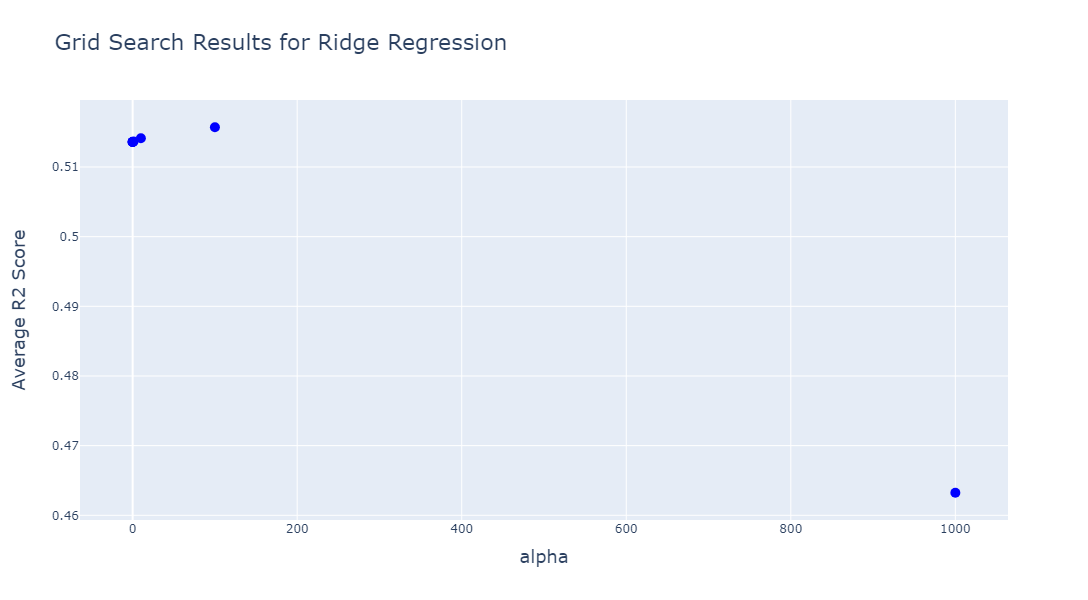

<Figure size 1920x1440 with 0 Axes>

In [47]:
import plotly.graph_objs as go
# import plotly.io as pio

# Set the default renderer for Plotly in JupyterLab
# pio.renderers.default = 'jupyterlab'

# Extract the results of the grid search
results_gs_ridge = gs_ridge.cv_results_
params_gs_ridge = results_gs_ridge['params']
mean_test_score_gs_ridge = results_gs_ridge['mean_test_score']

# Set a constant color for all points
constant_color = 'rgba(0, 0, 255, 1)' 

# Create a scatter plot of the test scores
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[params_gs_ridge[i]['alpha'] for i in range(len(params_gs_ridge))],
    y=mean_test_score_gs_ridge,
    mode='markers',
    marker=dict(
        size=10,
        color=constant_color,
        showscale=False  # Disable the color scale
    )
))

# Set the axis labels and title
fig.update_layout(
    title=dict(text='Grid Search Results for Ridge Regression', font=dict(size=22)),
    xaxis_title=dict(text='alpha', font=dict(size=18)),
    yaxis_title=dict(text='Average R2 Score', font=dict(size=18)),
    height=600,  
    width=800   
)

# Display the plot
fig.show()

# Save the image
# plt.savefig("your_path/figS5.jpg")

#### **Ridge Regression on the training set**

In [48]:
# print(gs_ridge.cv_results_)
print("Best R2 score (mean cross-validated score of best estimator): {}". format(gs_ridge.best_score_))  # the mean cross-validated score (e.g., R2 score) of the best model found by the grid search
print("Best parameters for ridge regression: {}".format(gs_ridge.best_params_)) # Parameter setting that gave the best results on the hold out data.

### RIDGE REGRESSION: TRAINING SET
# PERFORMANCE METRICS
# TRAINING SET
RIDGE_regr = gs_ridge.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_pred_ridge = RIDGE_regr.predict(X_train)

print("\nPerformance of ridge regression on the training set:")
print("    R2 score: {}".format(r2_score(y_train, y_pred_ridge)))
print("    Mean absolute error: {}".format(mean_absolute_error(y_train, y_pred_ridge)))
print("    Mean squared error: {}".format(mean_squared_error(y_train, y_pred_ridge)))

Best R2 score (mean cross-validated score of best estimator): 0.515707188258095
Best parameters for ridge regression: {'alpha': 100}

Performance of ridge regression on the training set:
    R2 score: 0.5353468714417198
    Mean absolute error: 0.5269269251336853
    Mean squared error: 0.5357177981232607


#### **Ridge Regression on the test set**

In [49]:
print(gs_ridge.best_estimator_.score(X_test, y_test))  # the score (e.g., R2 score) of the best model found by the grid search on the test set

0.5635795796530281


In [50]:
### RIDGE REGRESSION: TEST SET
r2_ridge = []
mae_ridge = []
mse_ridge = []

for i in range(100):
    X_test_resampled_RIDGE_regr, y_test_resampled_RIDGE_regr = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_pred_RIDGE_regr = RIDGE_regr.predict(X_test_resampled_RIDGE_regr)
    r2_ridge.append(r2_score(y_test_resampled_RIDGE_regr, y_pred_RIDGE_regr))
    mae_ridge.append(mean_absolute_error(y_test_resampled_RIDGE_regr, y_pred_RIDGE_regr))
    mse_ridge.append(mean_squared_error(y_test_resampled_RIDGE_regr, y_pred_RIDGE_regr))

print("Mean scores for ridge regression in the test set with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_ridge), np.percentile(r2_ridge, 2.5), np.percentile(r2_ridge, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_ridge), np.percentile(mae_ridge, 2.5), np.percentile(mae_ridge, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_ridge), np.percentile(mse_ridge, 2.5), np.percentile(mse_ridge, 97.5)))

Mean scores for ridge regression in the test set with 95% confidence intervals:
    R2 score: 0.56 [0.45, 0.63]
    Mean absolute error: 0.50 [0.46, 0.54]
    Mean squared error: 0.40 [0.34, 0.47]


**Plots**



**RIDGE REGRESSION**

**Scatter Plot: actual and predicted values**


In [51]:
## Set high DPI as default for all figures
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [52]:
assert y_test.shape == y_pred_RIDGE_regr.shape, "Shapes of y_test and y_pred are different!"

AssertionError: Shapes of y_test and y_pred are different!

If AssertionError: Shapes of y_test and y_pred are different!

Then uncomment this line below: y_test = np.ravel(y_test)

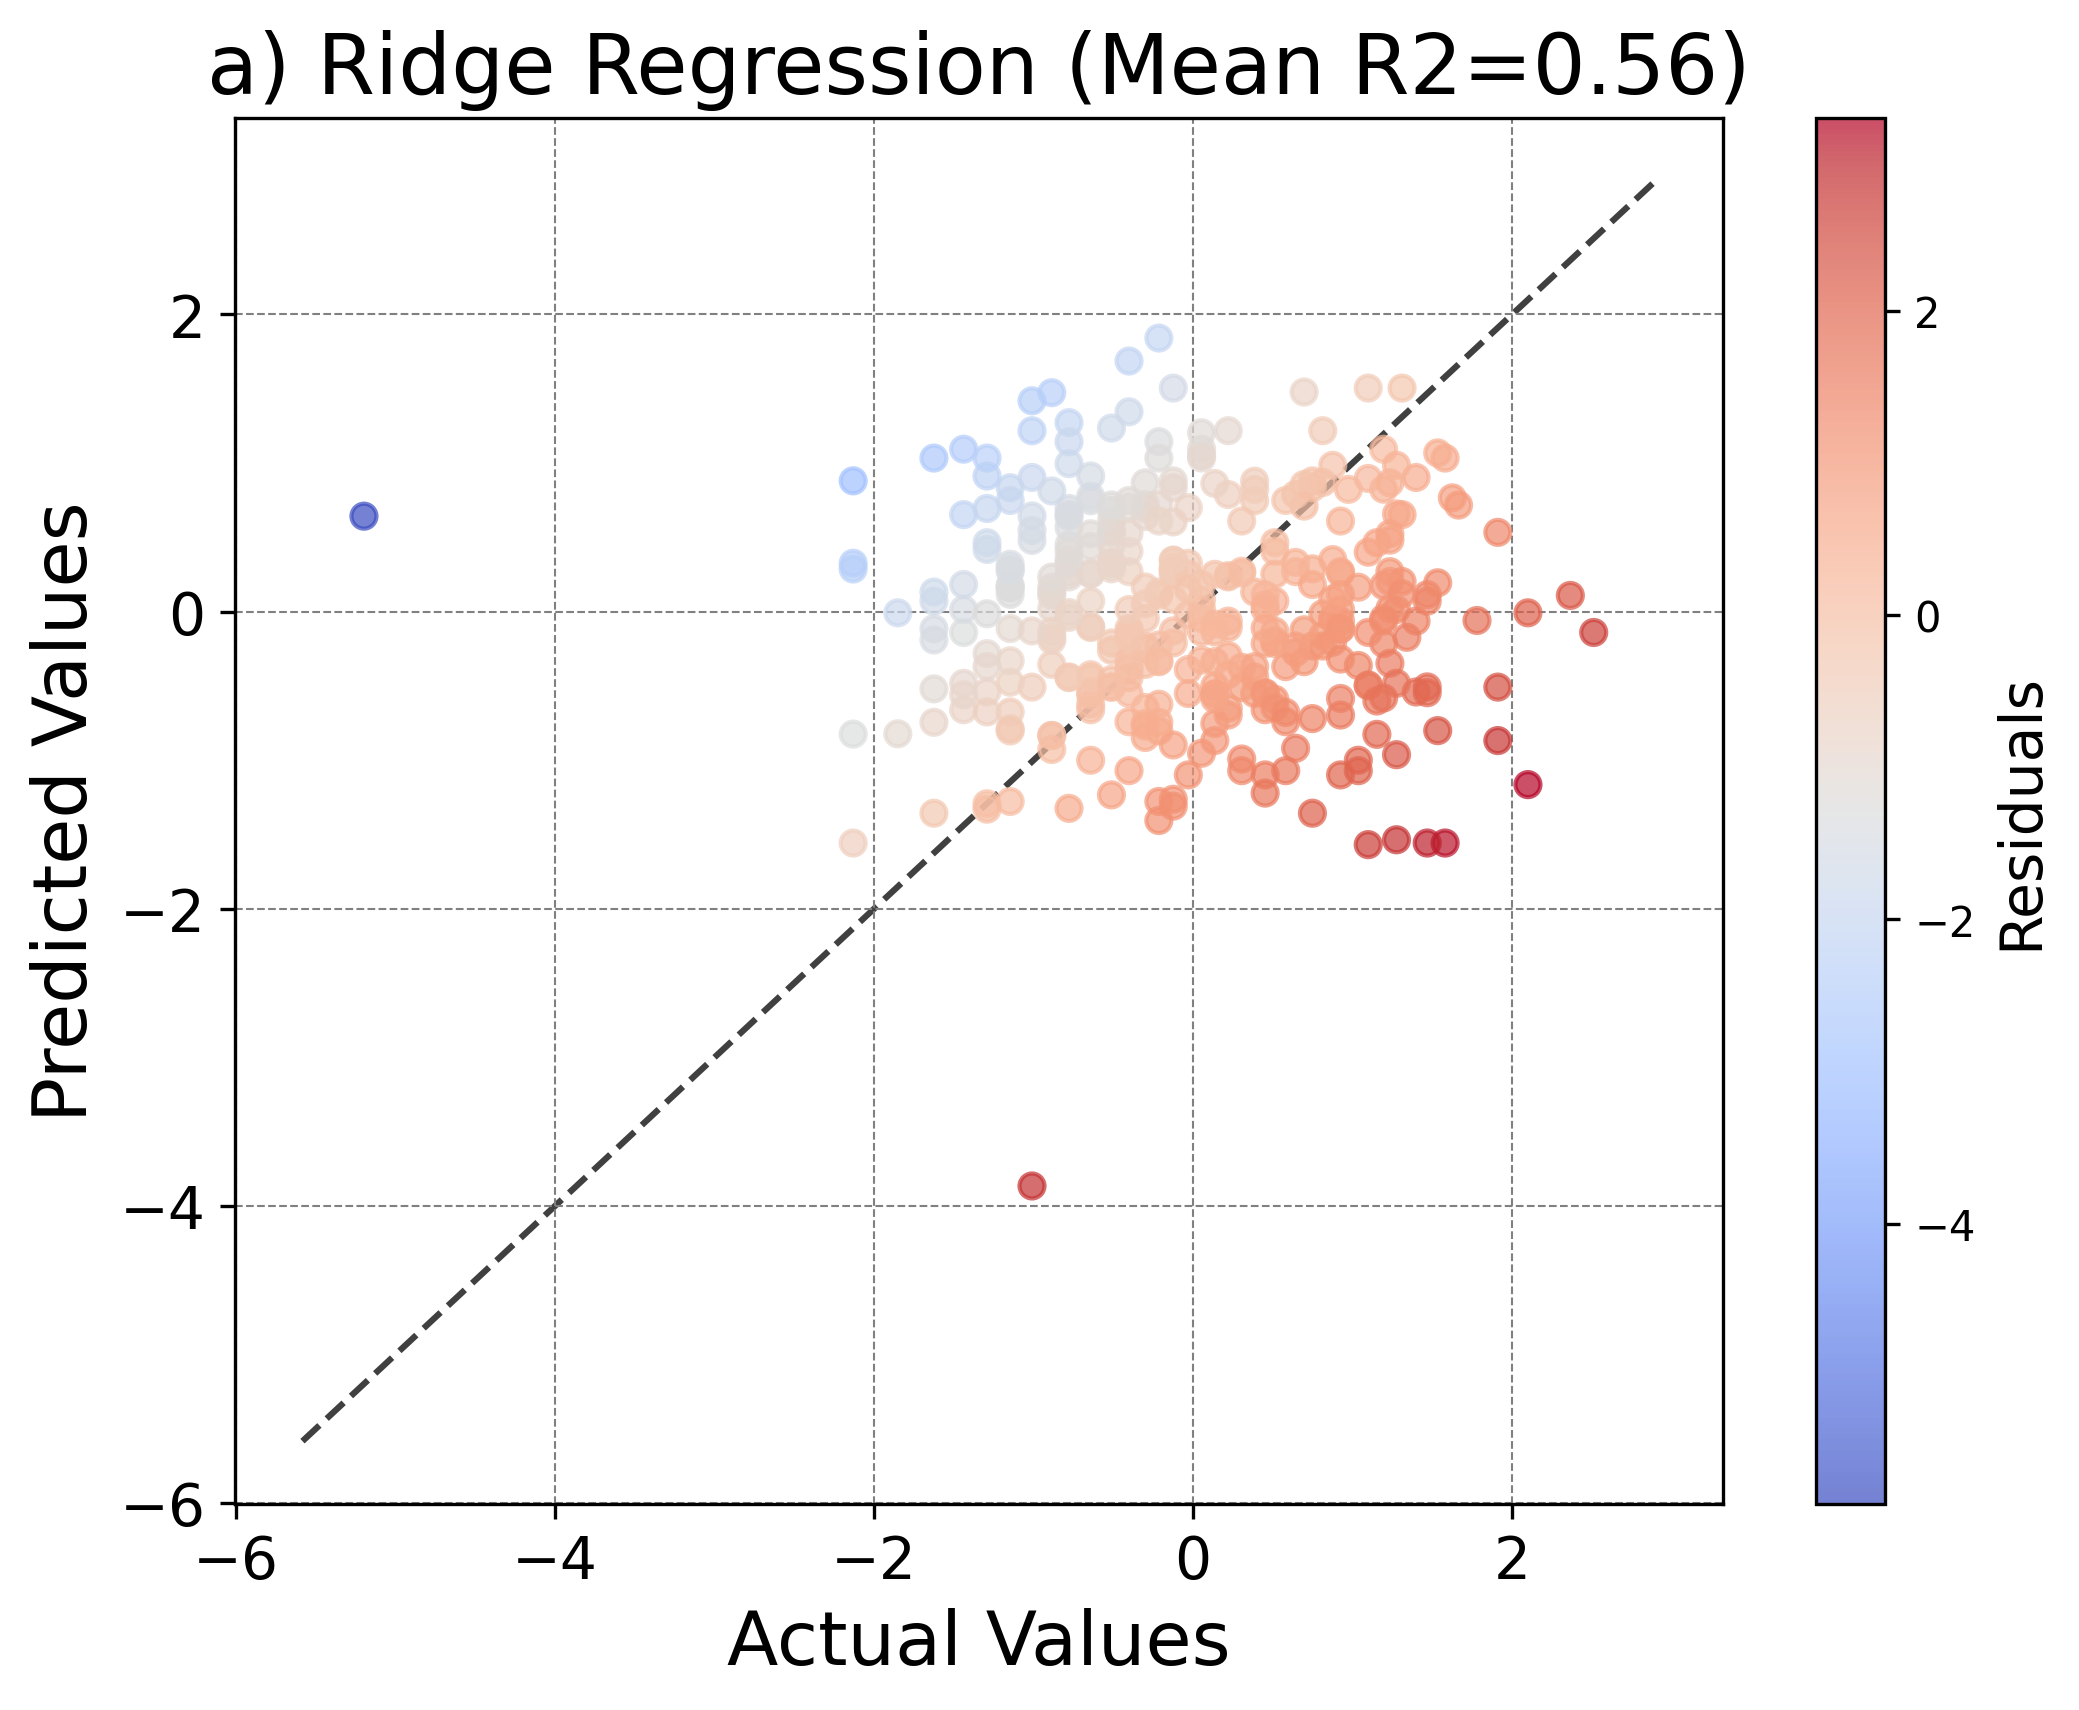

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Ensure that y_test and y_pred have the same shape
y_test = np.ravel(y_test) # If AssertionError: Shapes of y_test and y_pred are different! uncomment this line

# calculate residuals
residuals_ridge = y_test - y_pred_RIDGE_regr

# create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

# Add horizontal and vertical grid lines
ax.set_axisbelow(True) 
ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray')

scatter = ax.scatter(y_test, y_pred_RIDGE_regr, c=residuals_ridge, cmap='coolwarm', alpha=0.7)

# add diagonal line
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k--', alpha=0.75,  zorder=0)

# add colorbar for residuals
# cbar = plt.colorbar(scatter)
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel('Residuals', fontsize=14)

# set axis labels and title
ax.set_xlabel('Actual Values',fontsize=18)
ax.set_ylabel('Predicted Values',fontsize=18)
ax.set_title(f'a) Ridge Regression (Mean R2={np.mean(r2_ridge):.2f})', fontsize=20)

# set tick label size
ax.tick_params(axis='both',which='major',labelsize=14)

# show plot
plt.show()

### **Random forest regressor**

In [41]:
### RANDOM FOREST REGRESSOR
# GRID SEARCH WITH 10-FOLD CROSS-VALIDATION
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

p_grid_RF = {
    'n_estimators': [50, 100, 500, 1000],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3]}

gs_RF = GridSearchCV(
    estimator=RandomForestRegressor(random_state=0),
    param_grid=p_grid_RF,
    scoring='r2',
    n_jobs=-1,
    refit=True,
    cv=KFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_RF.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 500, 1000]},
             return_train_score=True, scoring='r2')

In [42]:
# Save the trained model to a file
import jblib

joblib.dump(gs_RF, 'gs_RF.pkl')

['gs_RF.pkl']

In [160]:
# Load the saved model
importjoblib

gs_RF = joblib.load('gs_RF.pkl')

In [161]:
best_model_RF_regr = gs_RF.best_estimator_
best_model_RF_regr

RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=50, random_state=0)

In [57]:
# Use the loaded model for predictions
predictions = gs_RF.predict(X_test)
# predictions

In [162]:
pd.DataFrame(gs_RF.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.762067,0.256830,0.006209,0.001262,5,1,2,50,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.391292,...,0.660502,0.657813,0.649763,0.658129,0.656495,0.660264,0.650875,0.655919,0.657053,0.005389
1,0.522946,0.131211,0.008939,0.001853,5,1,2,100,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.397319,...,0.665596,0.657920,0.648993,0.658742,0.655270,0.663924,0.653501,0.660400,0.658407,0.005892
2,2.106285,0.169368,0.037397,0.001278,5,1,2,500,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.405058,...,0.666534,0.659585,0.652086,0.656573,0.656422,0.663923,0.654770,0.661269,0.659519,0.005227
3,4.085726,0.170553,0.072656,0.002872,5,1,2,1000,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.406639,...,0.666084,0.659089,0.652278,0.657113,0.656081,0.664006,0.654972,0.662305,0.659711,0.005093
4,0.202781,0.008276,0.004852,0.000319,5,1,5,50,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.386738,...,0.654835,0.651884,0.644744,0.653336,0.649142,0.655514,0.645676,0.650847,0.651739,0.005758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,7.027697,0.157835,0.100563,0.015874,15,3,5,1000,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",0.375626,...,0.801535,0.796328,0.797758,0.797570,0.802795,0.803691,0.796677,0.795289,0.798898,0.003378
104,0.375091,0.046626,0.006855,0.002430,15,3,8,50,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",0.363593,...,0.776636,0.772254,0.774188,0.776958,0.776152,0.780389,0.773048,0.769936,0.775170,0.003492
105,0.629945,0.008325,0.010101,0.000701,15,3,8,100,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",0.373691,...,0.780236,0.773154,0.776541,0.778842,0.779298,0.781488,0.775137,0.774696,0.777234,0.003723
106,3.167954,0.043462,0.044326,0.002281,15,3,8,500,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",0.384950,...,0.782126,0.777780,0.777393,0.777695,0.782173,0.782992,0.777156,0.776634,0.779375,0.003396


**Display the results of the Grid Search**

In [163]:
print("Best hyperparameter:", gs_RF.best_params_)
print("Best cross-validation score:", gs_RF.best_score_)

Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50}
Best cross-validation score: 0.4959765595163009


**Display the mean test score and the corresponding hyperparameters for each grid search**

In [164]:
import pandas as pd
from IPython.display import display

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Extract the grid search results
results_gs_RF = gs_RF.cv_results_

# Convert the results to a pandas DataFrame
df_results_gs_RF = pd.DataFrame(results_gs_RF)

# Print the mean test score for each hyperparameter combination
print(df_results_gs_RF[['mean_test_score', 'params']])

# Reset display options to default if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

     mean_test_score  \
0           0.490440   
1           0.490503   
2           0.490880   
3           0.492089   
4           0.493574   
5           0.492713   
6           0.492752   
7           0.493907   
8           0.494499   
9           0.494350   
10          0.494833   
11          0.495730   
12          0.491634   
13          0.490389   
14          0.489265   
15          0.489948   
16          0.494168   
17          0.492618   
18          0.491075   
19          0.491378   
20          0.495895   
21          0.494897   
22          0.493814   
23          0.493930   
24          0.495194   
25          0.494826   
26          0.493699   
27          0.493373   
28          0.495194   
29          0.494826   
30          0.493699   
31          0.493373   
32          0.495977   
33          0.495509   
34          0.494082   
35          0.493627   
36          0.461305   
37          0.460461   
38          0.462779   
39          0.462137   
40          0.47

**Display the grid search as an image:**

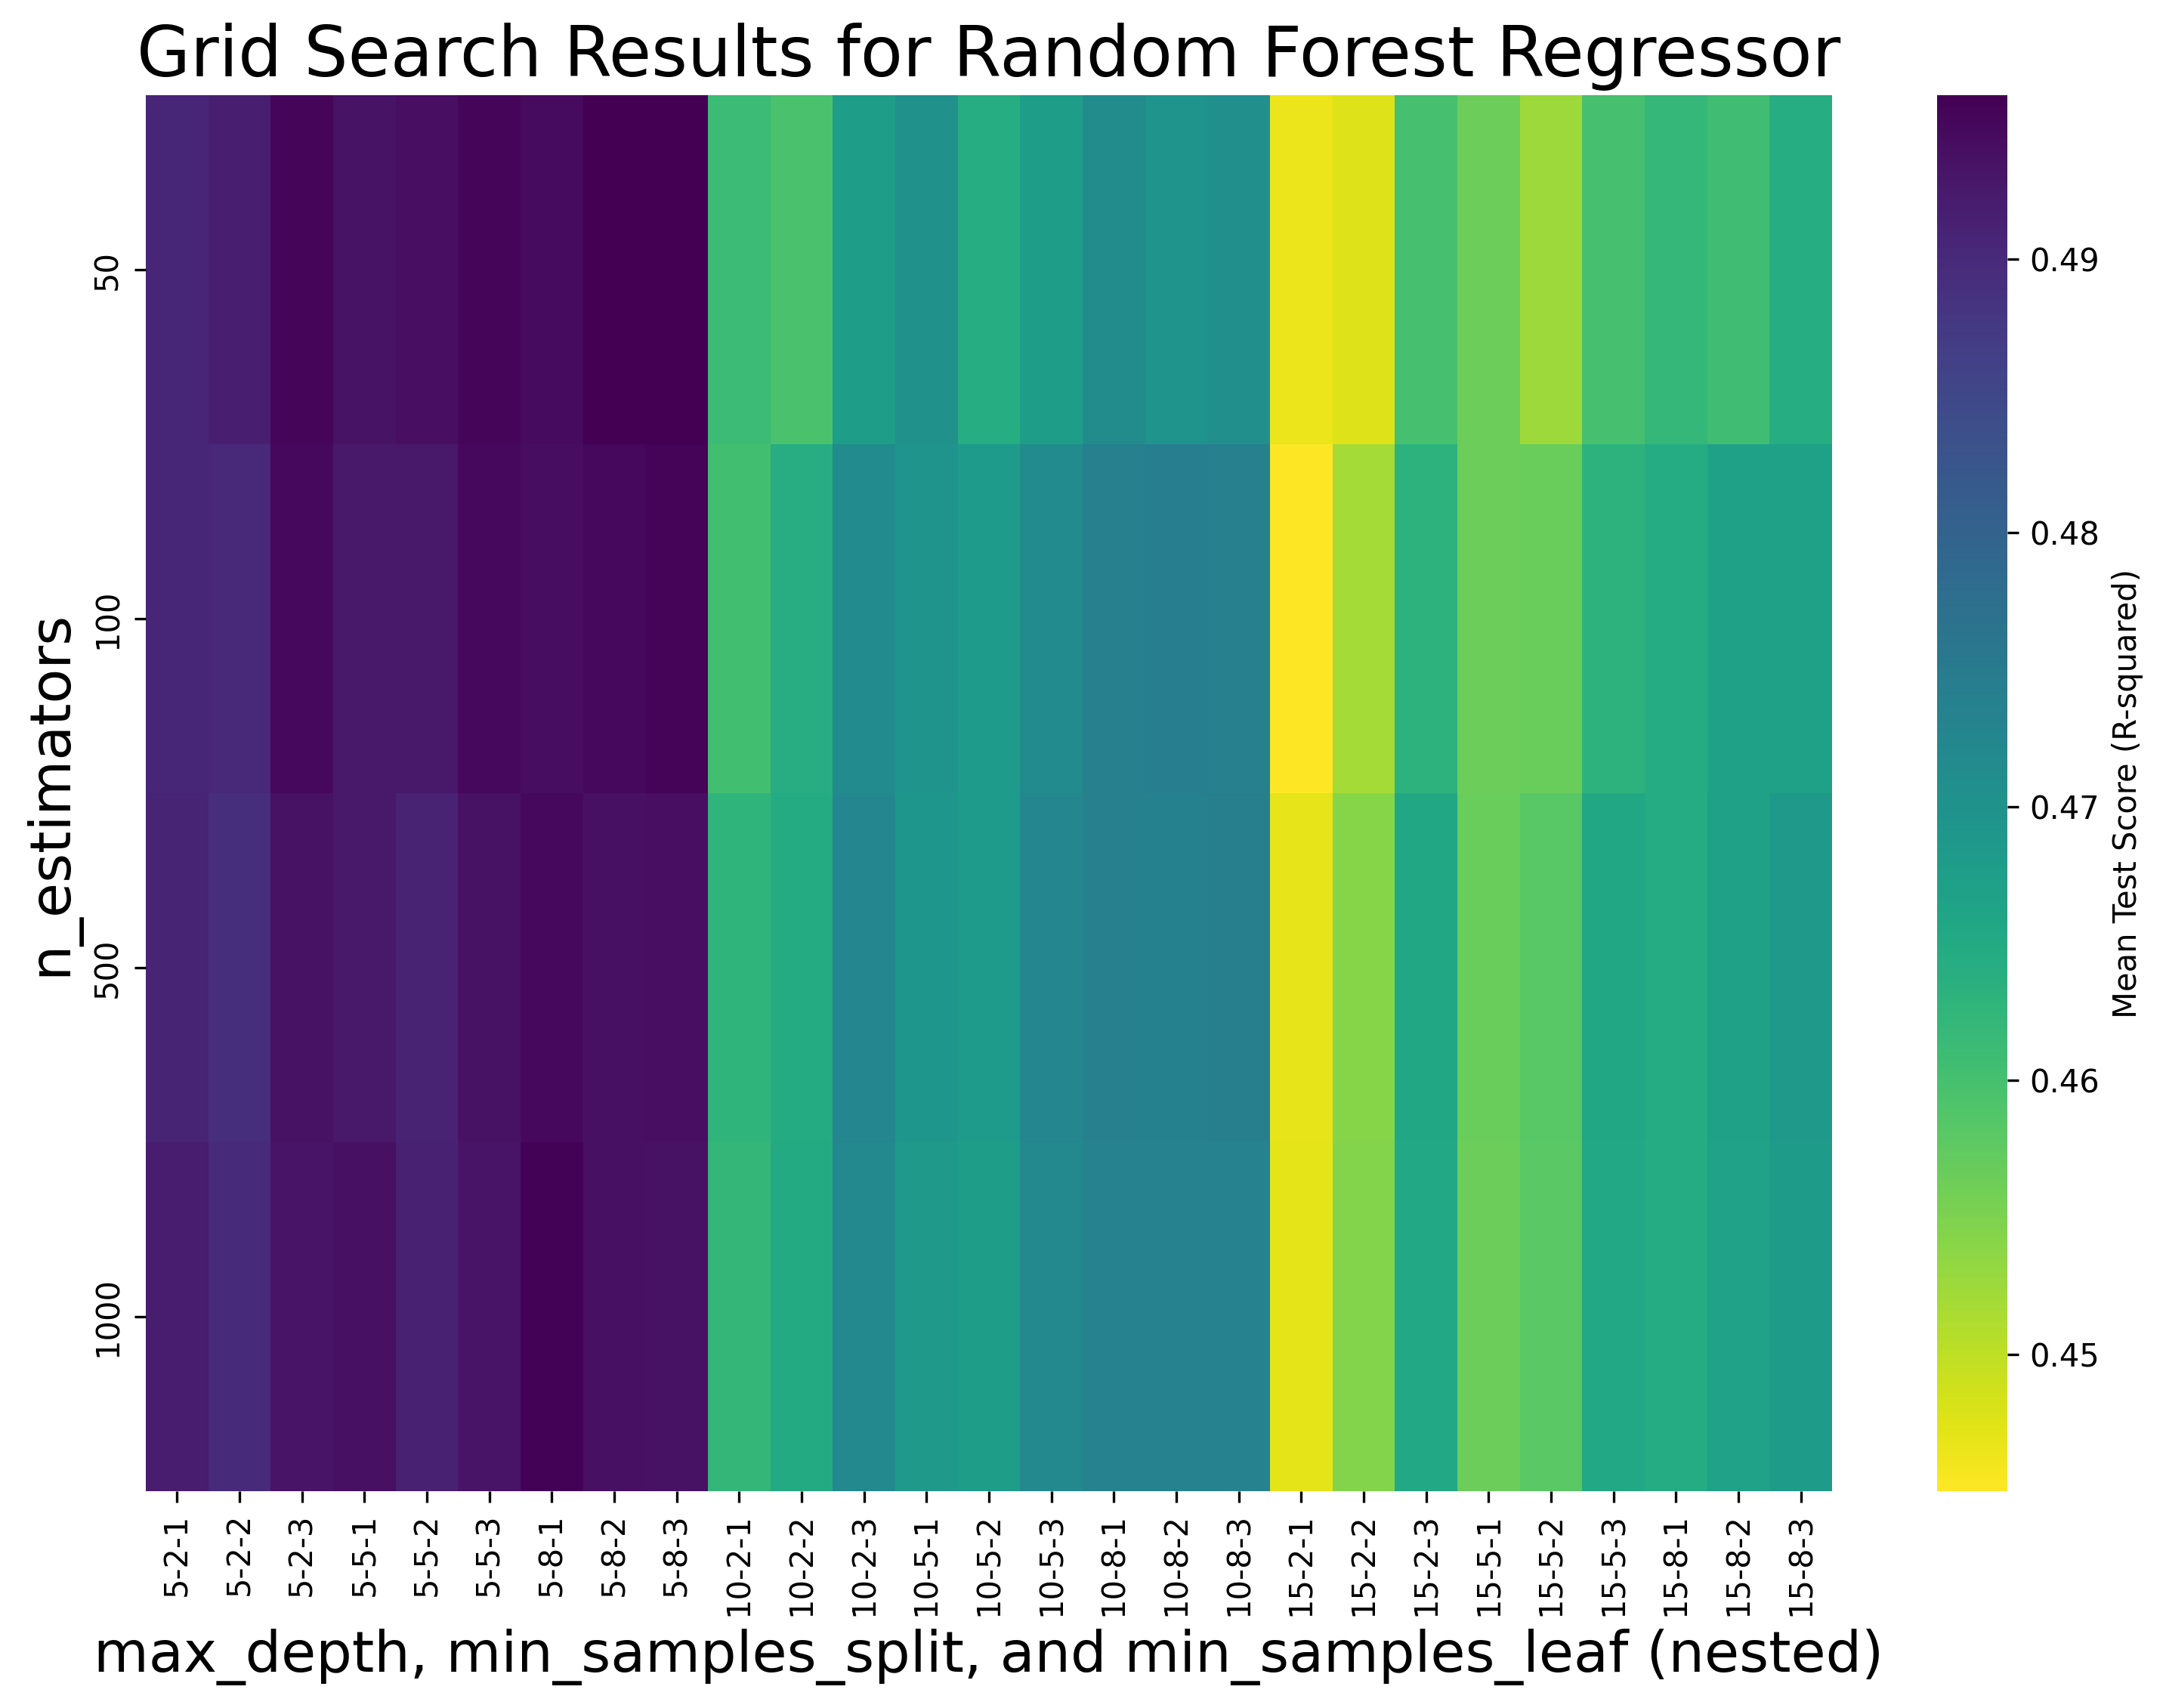

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting the results from the grid search
results = pd.DataFrame(gs_RF.cv_results_)

# Extracting relevant columns
columns = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']
heatmap_data = results[columns]

# Pivot the DataFrame for better visualization
heatmap_data_pivot = heatmap_data.pivot_table(index=['param_n_estimators' ],
                                              columns=['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf'],
                                              values='mean_test_score')

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the heatmap
# plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_pivot, annot=False, cmap='viridis_r', fmt='.3f', cbar_kws={'label': 'Mean Test Score (R-squared)'})
plt.title('Grid Search Results for Random Forest Regressor', fontsize=22)
ax.set_xlabel('max_depth, min_samples_split, and min_samples_leaf (nested)', fontsize=18) 
ax.set_ylabel('n_estimators', fontsize=18) 

# Save the image
# fig.savefig("your_path/fig_S6.jpg")

# Display the plot in the Jupyter Notebook
plt.show()

**Random Forest regressor on the training set**

In [165]:
# print(gs_RF.cv_results_)
print("Best R2 score (mean cross-validated score of best estimator): {}". format(gs_RF.best_score_))  # the mean cross-validated score (e.g., R2 score) of the best model found by the grid search
print("Best parameters for random forest regressor: {}".format(gs_RF.best_params_)) # Parameter setting that gave the best results on the hold out data.

### RANDOM FOREST REGRESSOR: TRAINING SET
# PERFORMANCE METRICS
# TRAINING SET
RF_regr = gs_RF.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_pred_RF = RF_regr.predict(X_train)

print("\nPerformance of random forest regressor on the training set:")
print("    R2 score: {}".format(r2_score(y_train, y_pred_RF)))
print("    Mean absolute error: {}".format(mean_absolute_error(y_train, y_pred_RF)))
print("    Mean squared error: {}".format(mean_squared_error(y_train, y_pred_RF)))

Best R2 score (mean cross-validated score of best estimator): 0.4959765595163009
Best parameters for random forest regressor: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50}

Performance of random forest regressor on the training set:
    R2 score: 0.6271134094723517
    Mean absolute error: 0.48401429098499366
    Mean squared error: 0.4299163633030527


**Random Forest regressor on the test set**

In [ ]:
# To ensure that y_test and y_pred have the same shape, you can use the assert statement to verify their shapes are equal:
# This will raise an assertion error if the shapes of y_test and y_pred are not equal.

# assert y_test.shape == y_pred_RF.shape, "Shapes of y_test and y_pred are different!"

In [166]:
print(gs_RF.best_estimator_.score(X_test, y_test))  # the score (e.g., R2 score) of the best model found by the grid search on the test set

0.5059466516431503


In [168]:
### RANDOM FOREST REGRESSOR: TEST SET

r2_RF = []
mae_RF = []
mse_RF = []

for i in range(100):
    X_test_resampled_RF_regr, y_test_resampled_RF_regr = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_pred_RF_regr = RF_regr.predict(X_test_resampled_RF_regr)
    r2_RF.append(r2_score(y_test_resampled_RF_regr, y_pred_RF_regr))
    mae_RF.append(mean_absolute_error(y_test_resampled_RF_regr, y_pred_RF_regr))
    mse_RF.append(mean_squared_error(y_test_resampled_RF_regr, y_pred_RF_regr))

print("Mean scores for random forest regressor in the test set with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_RF), np.percentile(r2_RF, 2.5), np.percentile(r2_RF, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_RF), np.percentile(mae_RF, 2.5), np.percentile(mae_RF, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_RF), np.percentile(mse_RF, 2.5), np.percentile(mse_RF, 97.5)))

Mean scores for random forest regressor in the test set with 95% confidence intervals:
    R2 score: 0.50 [0.40, 0.59]
    Mean absolute error: 0.52 [0.48, 0.56]
    Mean squared error: 0.45 [0.38, 0.55]


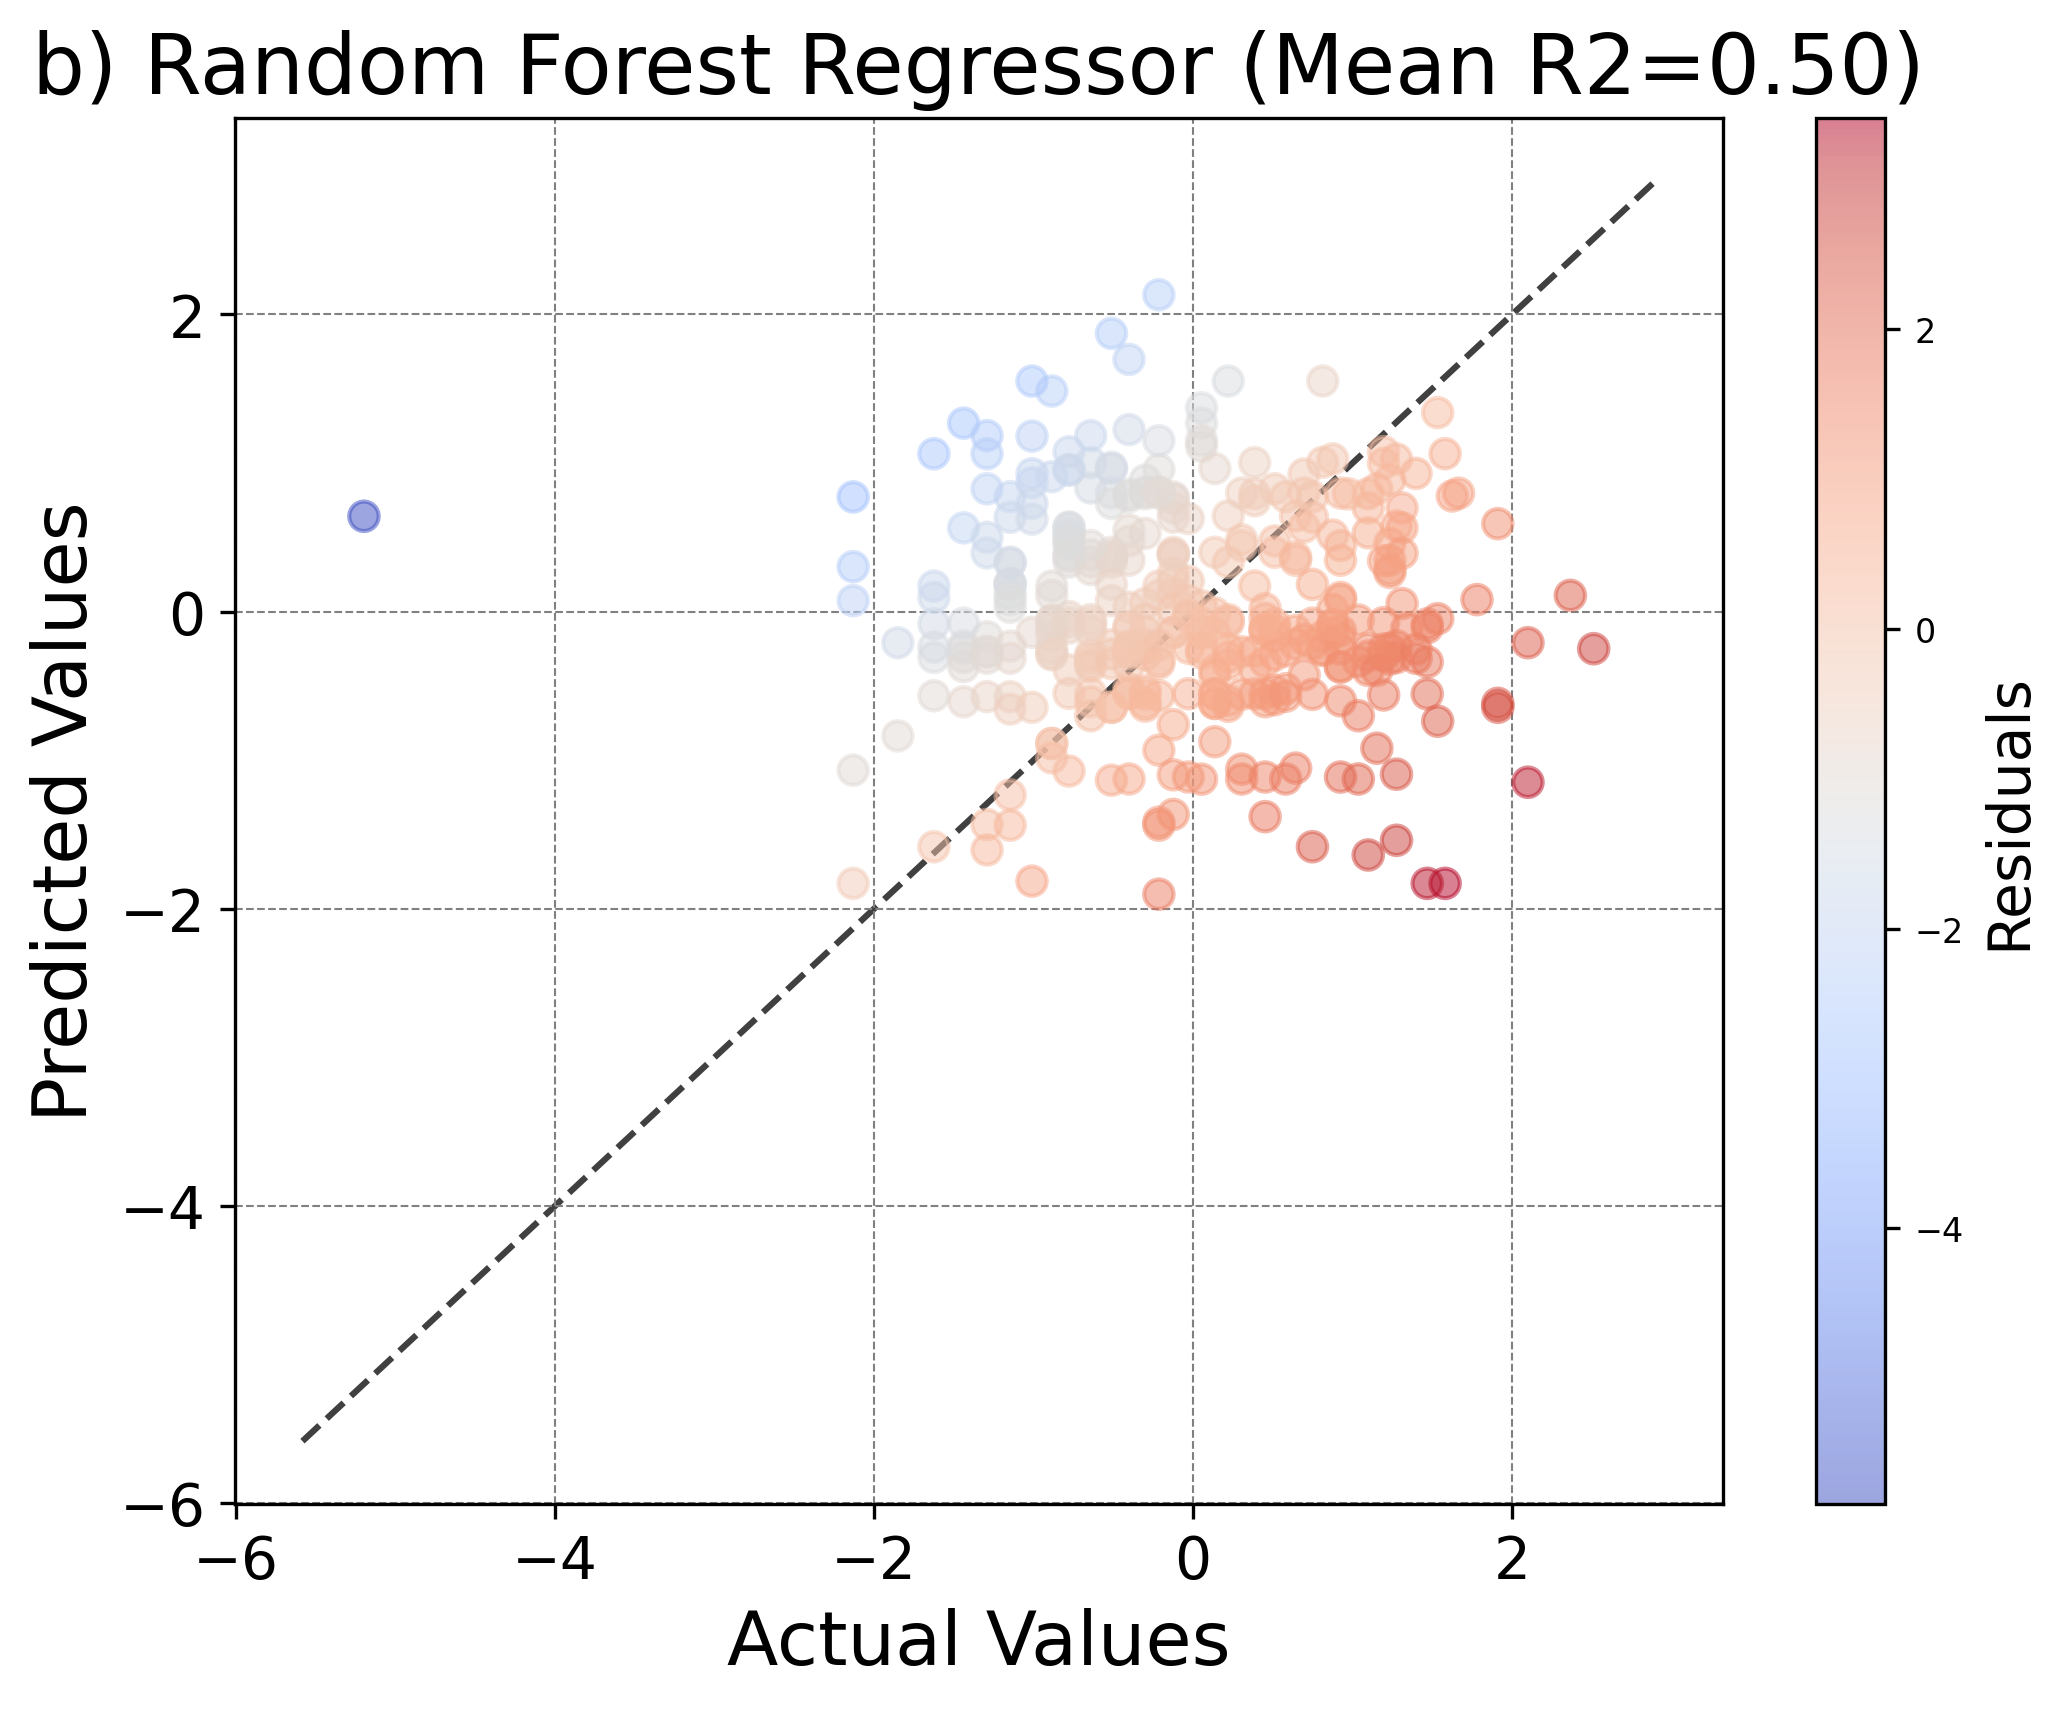

In [169]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Ensure that y_test and y_pred have the same shape
y_test = np.ravel(y_test)

# Compute residuals
residuals_RF = y_test - y_pred_RF_regr

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

# Add horizontal and vertical grid lines
ax.set_axisbelow(True) 
ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray')

sc = ax.scatter(y_test, y_pred_RF_regr, s=50, alpha=0.5, c=residuals_RF, cmap='coolwarm')

# Add diagonal line
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

# Add colorbar for residuals
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Residuals', fontsize=14)

# Set axis labels and title
ax.set_xlabel('Actual Values', fontsize=18)
ax.set_ylabel('Predicted Values', fontsize=18)
ax.set_title(f'b) Random Forest Regressor (Mean R2={np.mean(r2_RF):.2f})', fontsize=20)

# Set tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

# Save the image
# fig.savefig("your_path/fig_S9b.jpg")

plt.show()

### **SVR Regressor**

In [67]:
### SVM REGRESSOR
# GRID SEARCH WITH 10-FOLD CROSS-VALIDATION
from sklearn.svm import SVR

p_grid_SVR = [
    {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], # np.logspace(-2, 10, 13)
    'epsilon': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf'],
    'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}, # np.logspace(-9, 3, 13)
    {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], # np.logspace(-2, 10, 13)
    'epsilon': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear']}]

gs_SVR = GridSearchCV(
    estimator=SVR(),
    param_grid=p_grid_SVR,
    scoring='r2',
    n_jobs=-1,
    refit=True,
    cv=KFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_SVR.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'epsilon': [0.001, 0.01, 0.1, 1],
                          'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'epsilon': [0.001, 0.01, 0.1, 1],
                          'kernel': ['linear']}],
             return_train_score=True, scoring='r2')

In [68]:
# Save the trained model to a file
import joblib

joblib.dump(gs_SVR, 'gs_SVR.pkl')

['gs_SVR.pkl']

In [69]:
# Load the saved model
import joblib

gs_SVR = joblib.load('gs_SVR.pkl')

In [70]:
best_model_SVR = gs_SVR.best_estimator_
best_model_SVR

SVR(C=500, gamma=1e-05)

In [71]:
print("Best hyperparameters:", gs_SVR.best_params_)
print("Best cross-validation score:", gs_SVR.best_score_)

Best hyperparameters: {'C': 500, 'epsilon': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
Best cross-validation score: 0.514154612612752


In [ ]:
# Use the loaded model for predictions
# predictions = gs_SVR.predict(X_test)

In [72]:
pd.DataFrame(gs_SVR.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_gamma,param_kernel,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.099159,0.014351,0.538136,0.048314,0.01,0.001,0.00001,rbf,"{'C': 0.01, 'epsilon': 0.001, 'gamma': 1e-05, ...",-0.001227,...,0.000063,0.000324,-0.000349,0.000087,0.000304,0.000309,0.000138,-0.000398,-0.000273,0.001079
1,0.108864,0.016024,0.579012,0.034235,0.01,0.001,0.0001,rbf,"{'C': 0.01, 'epsilon': 0.001, 'gamma': 0.0001,...",0.001614,...,0.003084,0.003249,0.002674,0.002980,0.003282,0.003277,0.002945,0.002592,0.002683,0.001062
2,0.106235,0.016809,0.557237,0.032761,0.01,0.001,0.001,rbf,"{'C': 0.01, 'epsilon': 0.001, 'gamma': 0.001, ...",0.029217,...,0.032017,0.031337,0.031919,0.030880,0.031935,0.031837,0.030041,0.031503,0.031145,0.001084
3,0.118421,0.020043,0.634610,0.072055,0.01,0.001,0.01,rbf,"{'C': 0.01, 'epsilon': 0.001, 'gamma': 0.01, '...",0.199762,...,0.217011,0.212279,0.216553,0.210835,0.219662,0.220430,0.206048,0.215964,0.213764,0.005169
4,0.092811,0.009382,0.533770,0.016568,0.01,0.001,0.1,rbf,"{'C': 0.01, 'epsilon': 0.001, 'gamma': 0.1, 'k...",0.317582,...,0.355125,0.345745,0.352755,0.348520,0.350437,0.358873,0.348379,0.350964,0.350184,0.005710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2.614376,0.464700,0.002898,0.002349,500,1,NaN,linear,"{'C': 500, 'epsilon': 1, 'kernel': 'linear'}",0.430970,...,0.539240,0.529958,0.534841,0.523024,0.534182,0.540917,0.504498,0.536168,0.530408,0.011431
220,34.406653,3.187463,0.008478,0.007151,1000,0.001,NaN,linear,"{'C': 1000, 'epsilon': 0.001, 'kernel': 'linear'}",0.420828,...,0.541804,0.535328,0.537666,0.527921,0.539086,0.546191,0.508814,0.537848,0.534338,0.010797
221,36.627481,2.757366,0.007153,0.002975,1000,0.01,NaN,linear,"{'C': 1000, 'epsilon': 0.01, 'kernel': 'linear'}",0.421381,...,0.542162,0.535484,0.537660,0.527929,0.539272,0.546342,0.508883,0.538366,0.534541,0.010902
222,33.878201,3.243099,0.005428,0.000890,1000,0.1,NaN,linear,"{'C': 1000, 'epsilon': 0.1, 'kernel': 'linear'}",0.417158,...,0.542618,0.536159,0.539264,0.528720,0.540446,0.547059,0.510879,0.539931,0.535511,0.010775


<br>

**Display the results of the Grid Search:**

In [73]:
import pandas as pd

# Extract the results of the grid search
results = gs_SVR.cv_results_

# Convert the results to a data frame
df_results = pd.DataFrame(results)

# Print the data frame
print(df_results)

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.099159      0.014351         0.538136        0.048314    0.01   
1         0.108864      0.016024         0.579012        0.034235    0.01   
2         0.106235      0.016809         0.557237        0.032761    0.01   
3         0.118421      0.020043         0.634610        0.072055    0.01   
4         0.092811      0.009382         0.533770        0.016568    0.01   
..             ...           ...              ...             ...     ...   
219       2.614376      0.464700         0.002898        0.002349     500   
220      34.406653      3.187463         0.008478        0.007151    1000   
221      36.627481      2.757366         0.007153        0.002975    1000   
222      33.878201      3.243099         0.005428        0.000890    1000   
223       4.858335      0.773484         0.004310        0.004028    1000   

    param_epsilon param_gamma param_kernel  \
0           0.001     0.00001

<br>

**Display the GridSearchCV as an image:**

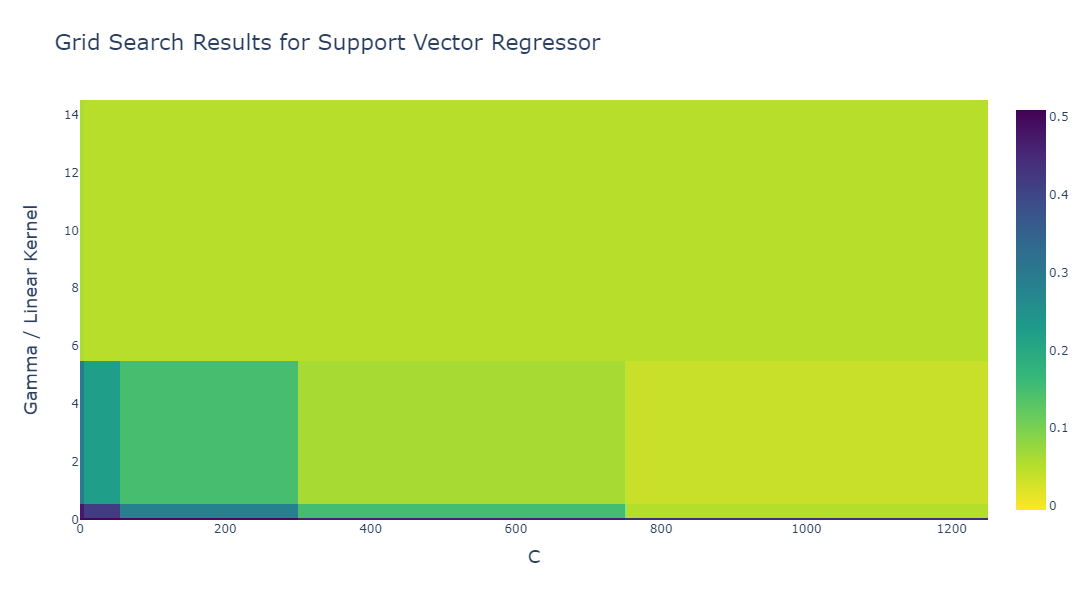

In [74]:
import plotly.graph_objs as go
import plotly.io as pio

# Set the default renderer for Plotly in JupyterLab
pio.renderers.default = 'jupyterlab'

# Extract the results of the grid search
results_gs_SVR = gs_SVR.cv_results_
params_gs_SVR = results_gs_SVR['params']
mean_test_score_gs_SVR = results_gs_SVR['mean_test_score']

# Create a matrix/heatmap plot
fig = go.Figure()

# Create heatmap trace
heatmap = go.Heatmap(
    x=[param['C'] for param in params_gs_SVR],
    y=[param['gamma'] if param['kernel'] == 'rbf' else 'linear' for param in params_gs_SVR],
    z=mean_test_score_gs_SVR,
    colorscale='Viridis_r',
    text=[f"Kernel: {param['kernel']}, Epsilon: {param['epsilon']}" for param in params_gs_SVR],
)

fig.add_trace(heatmap)

# Set the axis labels and title with modified font size
fig.update_layout(
    # title='Grid Search Results for Support Vector Regressor',
    title=dict(text='Grid Search Results for Support Vector Regressor', font=dict(size=22)),
    xaxis_title=dict(text='C', font=dict(size=18)),  
    yaxis_title=dict(text='Gamma / Linear Kernel', font=dict(size=18)),
    height=600, 
    width=800   
)

# Display the plot
fig.show()

#### **SVR regressor on the training set**

In [75]:
# print(gs_SVR.cv_results_)
print("Best R2 score (mean cross-validated score of best estimator): {}". format(gs_SVR.best_score_))
print("Best parameters for SVR: {}".format(gs_SVR.best_params_)) # Parameter setting that gave the best results on the hold out data.

### SVR: TRAINING SET
# PERFORMANCE METRICS
# TRAINING SET
SVM_regr = gs_SVR.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_pred_SVM = SVM_regr.predict(X_train)

print("\nPerformance of SVR regressor on training set:")
print("    R2 score: {}".format(r2_score(y_train, y_pred_SVM)))
print("    Mean absolute error: {}".format(mean_absolute_error(y_train, y_pred_SVM)))
print("    Mean squared error: {}".format(mean_squared_error(y_train, y_pred_SVM)))

Best R2 score (mean cross-validated score of best estimator): 0.514154612612752
Best parameters for SVR: {'C': 500, 'epsilon': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}

Performance of SVR regressor on training set:
    R2 score: 0.5336331824073531
    Mean absolute error: 0.5250198743158278
    Mean squared error: 0.5376935810454749


#### **SVR regressor on the test set**

In [76]:
print(gs_SVR.best_estimator_.score(X_test, y_test))

0.5652293795541947


In [77]:
r2_SVR = []
mae_SVR = []
mse_SVR = []

for i in range(100):
    X_test_resampled_SVM_regr, y_test_resampled_SVM_regr = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_pred_SVM_regr = SVM_regr.predict(X_test_resampled_SVM_regr)
    r2_SVR.append(r2_score(y_test_resampled_SVM_regr, y_pred_SVM_regr))
    mae_SVR.append(mean_absolute_error(y_test_resampled_SVM_regr, y_pred_SVM_regr))
    mse_SVR.append(mean_squared_error(y_test_resampled_SVM_regr, y_pred_SVM_regr))

print("Mean scores for SVR regressor in the test set with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_SVR), np.percentile(r2_SVR, 2.5), np.percentile(r2_SVR, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_SVR), np.percentile(mae_SVR, 2.5), np.percentile(mae_SVR, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_SVR), np.percentile(mse_SVR, 2.5), np.percentile(mse_SVR, 97.5)))

Mean scores for SVR regressor in the test set with 95% confidence intervals:
    R2 score: 0.56 [0.45, 0.64]
    Mean absolute error: 0.50 [0.46, 0.53]
    Mean squared error: 0.40 [0.33, 0.47]


In [78]:
# To ensure that y_test and y_pred have the same shape, you can use the assert statement to verify their shapes are equal:
# This will raise an assertion error if the shapes of y_test and y_pred are not equal.

assert y_test.shape == y_pred_SVM_regr.shape, "Shapes of y_test and y_pred are different!"

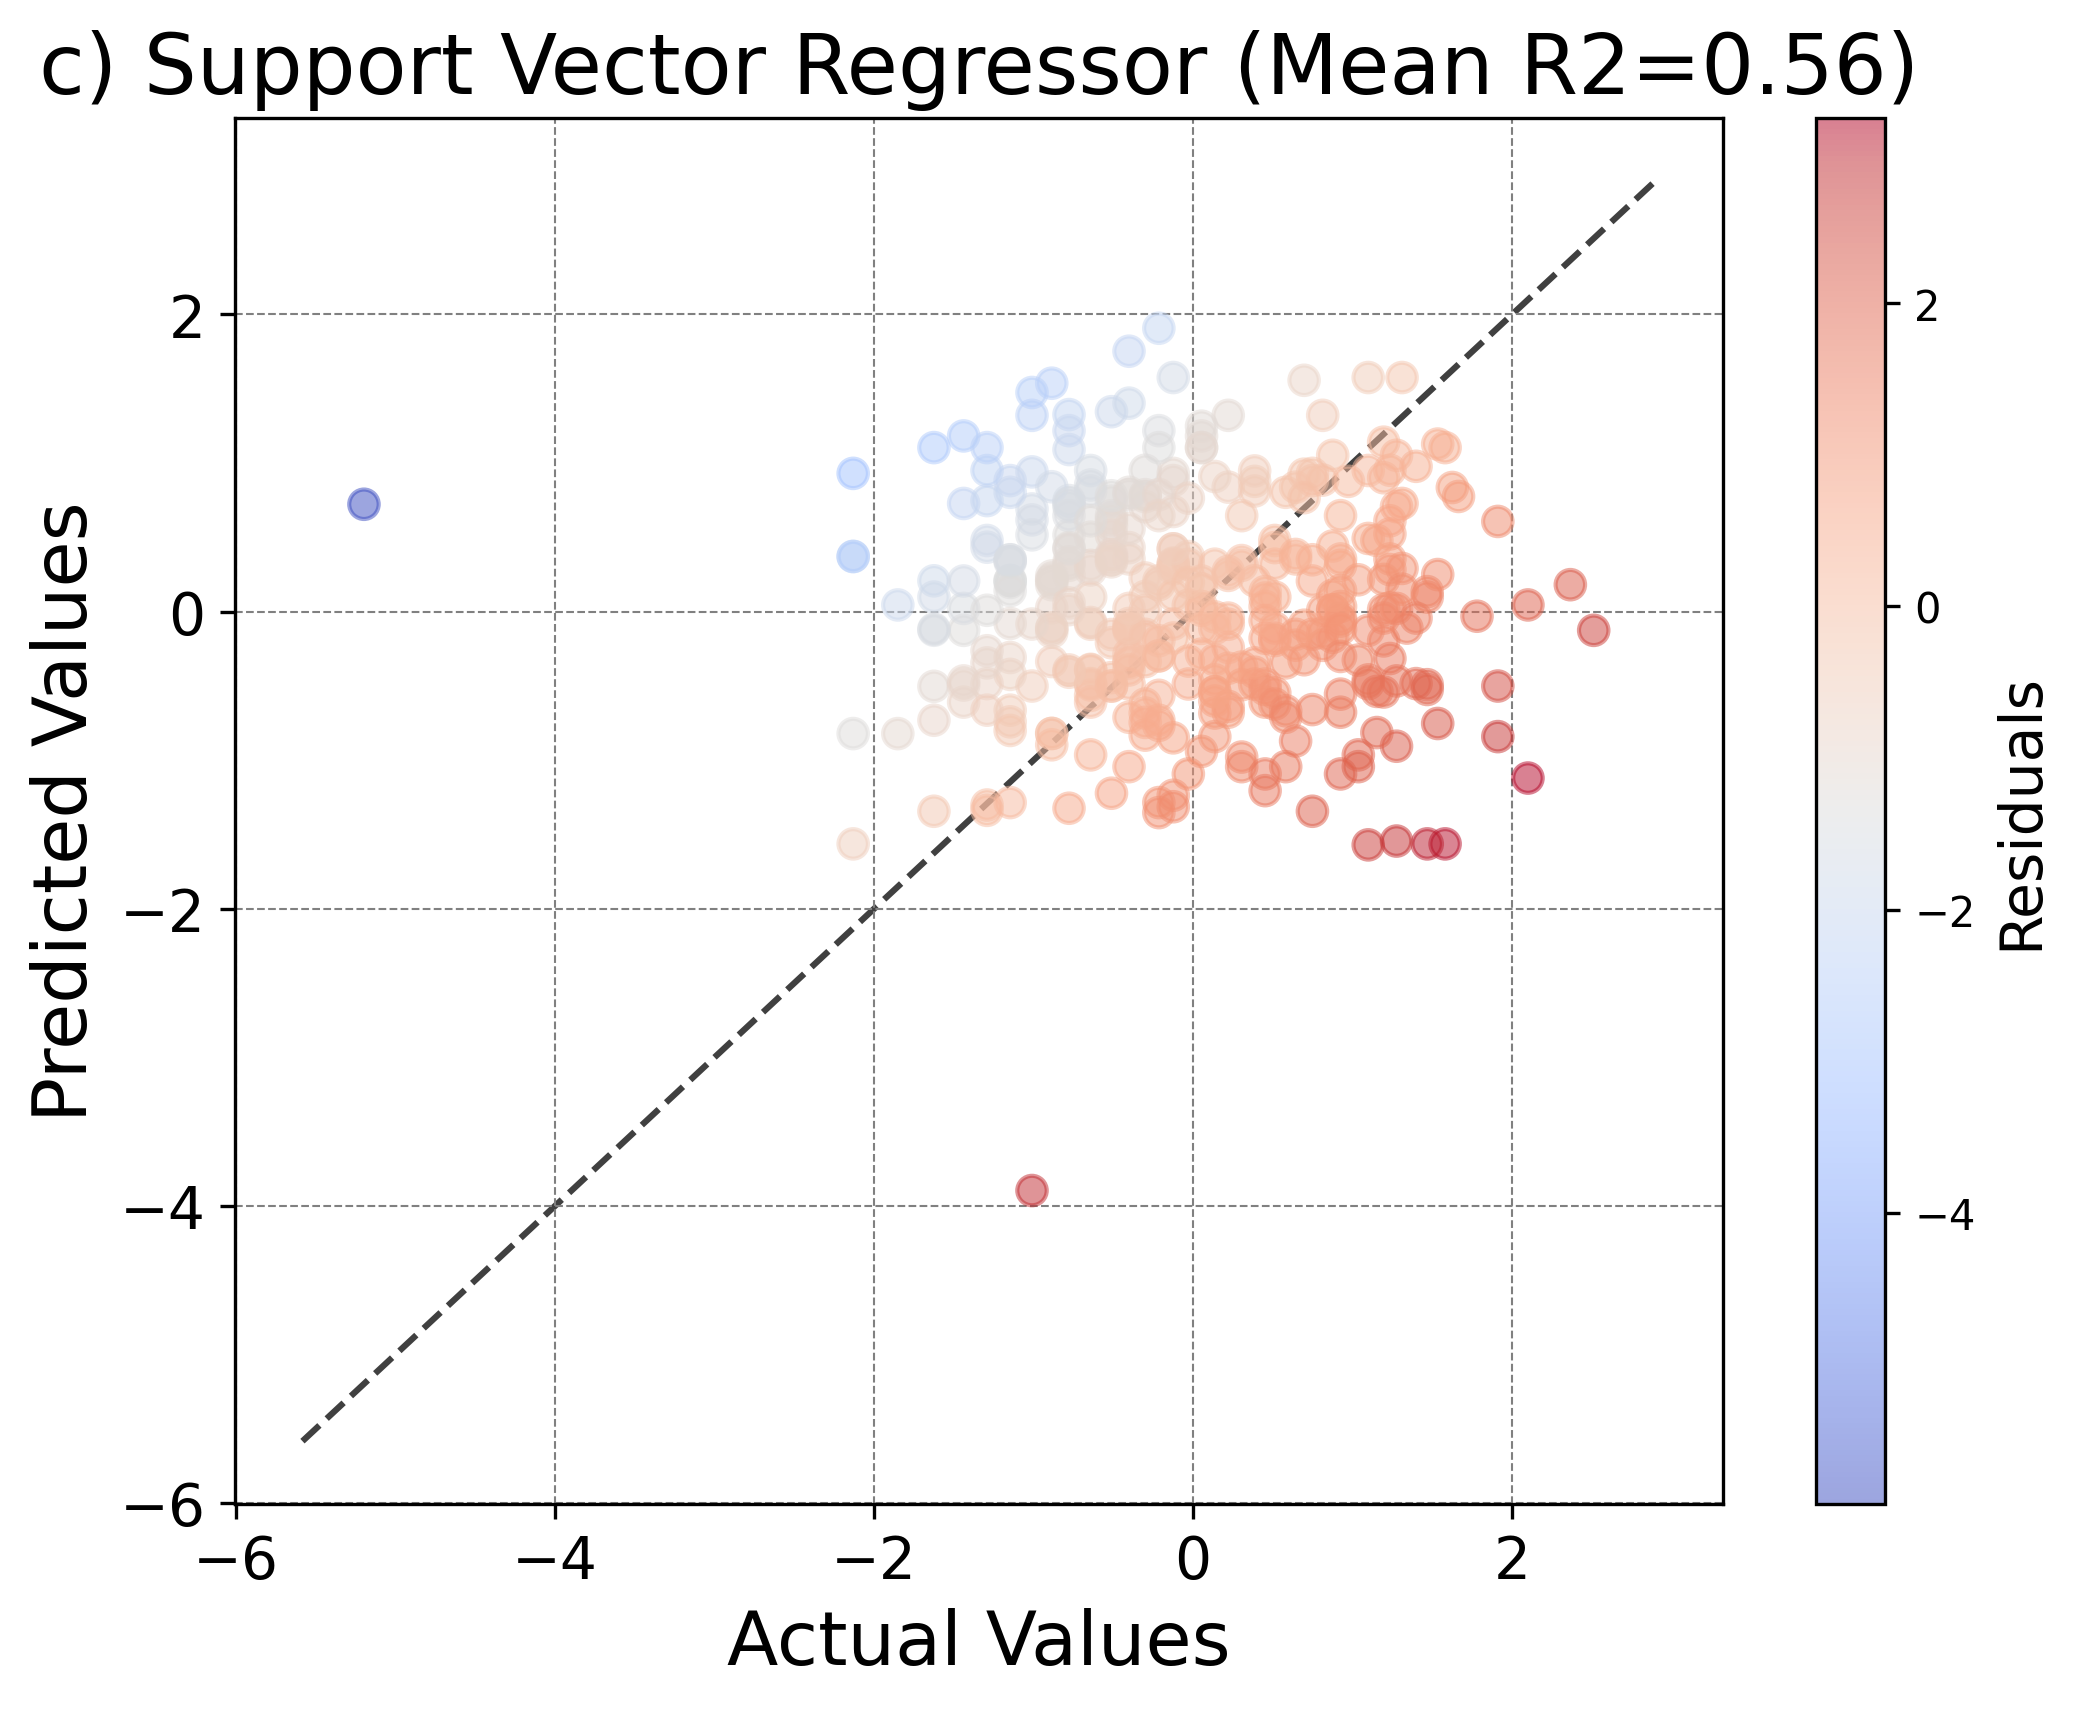

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


# Ensure that y_test and y_pred have the same shape
# y_test = np.ravel(y_test) # Not necessary if: assert ... does not show an error message

# Compute residuals
residuals_SVR = y_test - y_pred_SVM_regr

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

# Add horizontal and vertical grid lines
ax.set_axisbelow(True) 
ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray')

sc = ax.scatter(y_test, y_pred_SVM_regr, s=50, alpha=0.5, c=residuals_SVR, cmap='coolwarm') 

# Add diagonal line
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

# Add colorbar for residuals
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Residuals', fontsize=14)

# Set axis labels and title
ax.set_xlabel('Actual Values', fontsize=18)
ax.set_ylabel('Predicted Values', fontsize=18)
ax.set_title(f'c) Support Vector Regressor (Mean R2={np.mean(r2_SVR):.2f})', fontsize=20)

# Set tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## **Figures 3 (a, b, c)**

In [86]:
import matplotlib as mpl

In [99]:
cm = 1/2.54  # centimeters in inches

In [100]:
mpl.rcdefaults()
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams["xtick.labelsize"] = 8
mpl.rcParams["ytick.labelsize"] = 8
mpl.rcParams["legend.fontsize"] = 14

fig3 = plt.figure(layout='tight', figsize=(18*cm, 20*cm))

gs3 = fig3.add_gridspec(2, 2, **{"wspace":  0.3, "hspace": 0.35})

<Figure size 2125.98x2362.2 with 0 Axes>

**R-SQUARED**

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Scores of R2 in each ML algorithm (ridge regession, random forest, SVR) on the training set
train_scores = [0.5136580423911276, 0.4959765595163009, 0.5336331824073532, 0, 0, 0] # R2 SCORES

# Mean scores of R2 with 95% confidence intervals in each ML algorithm (ordinary least-squares regression, random forest, SVR) on the test set AND BASELINES (DUMMY MODELS)
mean_scores = [0.56, 0.50, 0.56, -1.02, -0.003, -0.003]
lower_ci = [0.45, 0.40, 0.45, -1.33, -0.01, -0.01]
upper_ci = [0.63, 0.59, 0.64, -0.78, -0.00001, -0.00002]

# Calculate error bars
lower_error = np.array(mean_scores) - np.array(lower_ci)
upper_error = np.array(upper_ci) - np.array(mean_scores)

# Set the labels for the performance metrics
# labels = ['Ridge\nregression', 'Random\nforest', 'SVR', 'Randomly\nshuffled baseline', 'Mean\nbaseline', 'Median\nbaseline']
labels = ['RR', 'RF', 'SVR', 'RAND SHUFF', 'MEAN', 'MDN']

# Set the x-axis values
x = np.arange(len(labels))

# Set the colors
train_color = 'lightblue'
test_color =  'blue'

# Plot the bar chart
ax3a = fig3.add_subplot(gs3[0, 0])

# Plot the bars
ax3a.bar(x - 0.2, train_scores, width=0.4, label='Training Set', color=train_color)
ax3a.bar(x + 0.2, mean_scores, width=0.4, yerr=(lower_error, upper_error), label='Test Set', color=test_color)

# Add horizontal grid lines
ax3a.set_axisbelow(True) 
ax3a.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set the axis labels and title
# ax.set_xlabel('Machine learning algorithms and baseline models',fontsize=14)
ax3a.set_ylabel('R2 scores')
ax3a.set_title('($\\bf{A}$) R-squared') 

# Set the x-axis tick labels
ax3a.set_xticks(x)
_ = ax3a.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

# Add a legend
# ax.legend()

# Show the plot
plt.show()

**MEAN ABSOLUTE ERROR**

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Scores of MEAN ABSOLUTE ERROR in each ML algorithm (ridge regession, random forest, SVR) on the training set
train_scores = [0.5324840095416633, 0.48401429098499366, 0.5250198743158278, 0, 0, 0] # MEAN ABSOLUTE ERROR SCORES

# Mean scores of MEAN ABSOLUTE ERROR with 95% confidence intervals in each ML algorithm (ordinary least-squares regression, random forest, SVR) on the test set AND BASELINES (DUMMY MODELS)
mean_scores = [0.50, 0.52, 0.50, 1.08, 0.78, 0.78]
lower_ci = [0.46, 0.48, 0.46, 1.01, 0.72, 0.72]
upper_ci = [0.54, 0.56, 0.53, 1.17, 0.85, 0.85]

# Calculate error bars
lower_error = np.array(mean_scores) - np.array(lower_ci)
upper_error = np.array(upper_ci) - np.array(mean_scores)

# Set the labels for the performance metrics
# labels = ['Ridge\nregression', 'Random\nforest', 'SVR', 'Randomly\nshuffled baseline', 'Mean\nbaseline', 'Median\nbaseline']
labels = ['RR', 'RF', 'SVR', 'RAND SHUFF', 'MEAN', 'MDN']

# Set the x-axis values
x = np.arange(len(labels))

# Set the colors
train_color = 'lightblue'
test_color =  'blue'

# Plot the bar chart
ax3b = fig3.add_subplot(gs3[0, 1])

# Plot the bars
ax3b.bar(x - 0.2, train_scores, width=0.4, label='Training Set', color=train_color)
ax3b.bar(x + 0.2, mean_scores, width=0.4, yerr=(lower_error, upper_error), label='Test Set', color=test_color)

# Add horizontal grid lines
ax3b.set_axisbelow(True) 
ax3b.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set the axis labels and title
# ax.set_xlabel('Machine learning algorithms and baseline models',fontsize=14)
ax3b.set_ylabel('Mean Absolute Error scores')
ax3b.set_title('($\\bf{B}$) Mean Absolute Error')

# Set the x-axis tick labels
ax3b.set_xticks(x)
_ = ax3b.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

# Add a legend
# ax.legend()

# Show the plot
# plt.show()

**MEAN SQUARED-ERROR**

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Scores of MEAN SQUARED ERROR in each ML algorithm (ridge regession, random forest, SVR) on the training set
train_scores = [0.5478534860231896, 0.4299163633030527, 0.5376935810454747, 0, 0, 0] # MEAN SQUARED ERROR SCORES

# Mean scores of MEAN SQUARED ERROR with 95% confidence intervals in each ML algorithm (ordinary least-squares regression, random forest, SVR) on the test set AND BASELINES (DUMMY MODELS)
mean_scores = [0.40, 0.45, 0.40, 1.85, 0.92, 0.92]
lower_ci = [0.34, 0.38, 0.33, 1.65, 0.77, 0.77]
upper_ci = [0.47, 0.55, 0.47, 2.13, 1.10, 1.10]

# Calculate error bars
lower_error = np.array(mean_scores) - np.array(lower_ci)
upper_error = np.array(upper_ci) - np.array(mean_scores)

# Set the labels for the performance metrics
# labels = ['Ridge\nregression', 'Random\nforest', 'SVR', 'Randomly\nshuffled baseline', 'Mean\nbaseline', 'Median\nbaseline']
labels = ['RR', 'RF', 'SVR', 'RAND SHUFF', 'MEAN', 'MDN']

# Set the x-axis values
x = np.arange(len(labels))

# Set the colors
train_color = 'lightblue'
test_color =  'blue'

# Plot the bar chart
ax3c = fig3.add_subplot(gs3[1, 0])

# Plot the bars
ax3c.bar(x - 0.2, train_scores, width=0.4, label='Training Set', color=train_color)
ax3c.bar(x + 0.2, mean_scores, width=0.4, yerr=(lower_error, upper_error), label='Test Set', color=test_color)

# Add horizontal grid lines
ax3c.set_axisbelow(True)
ax3c.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set the axis labels and title
ax3c.set_xlabel('Machine learning algorithms and baseline models', fontsize=10)
ax3c.set_ylabel('Mean Squared Error scores')
ax3c.set_title('($\\bf{C}$) Mean Squared Error') 

# Set the x-axis tick labels
ax3c.set_xticks(x)
_ = ax3c.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

# Add a legend
# ax.legend()

# Show the plot
# plt.show()

C:\Users\stein\AppData\Local\Temp\ipykernel_34348\1020394885.py:23: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

C:\Users\stein\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



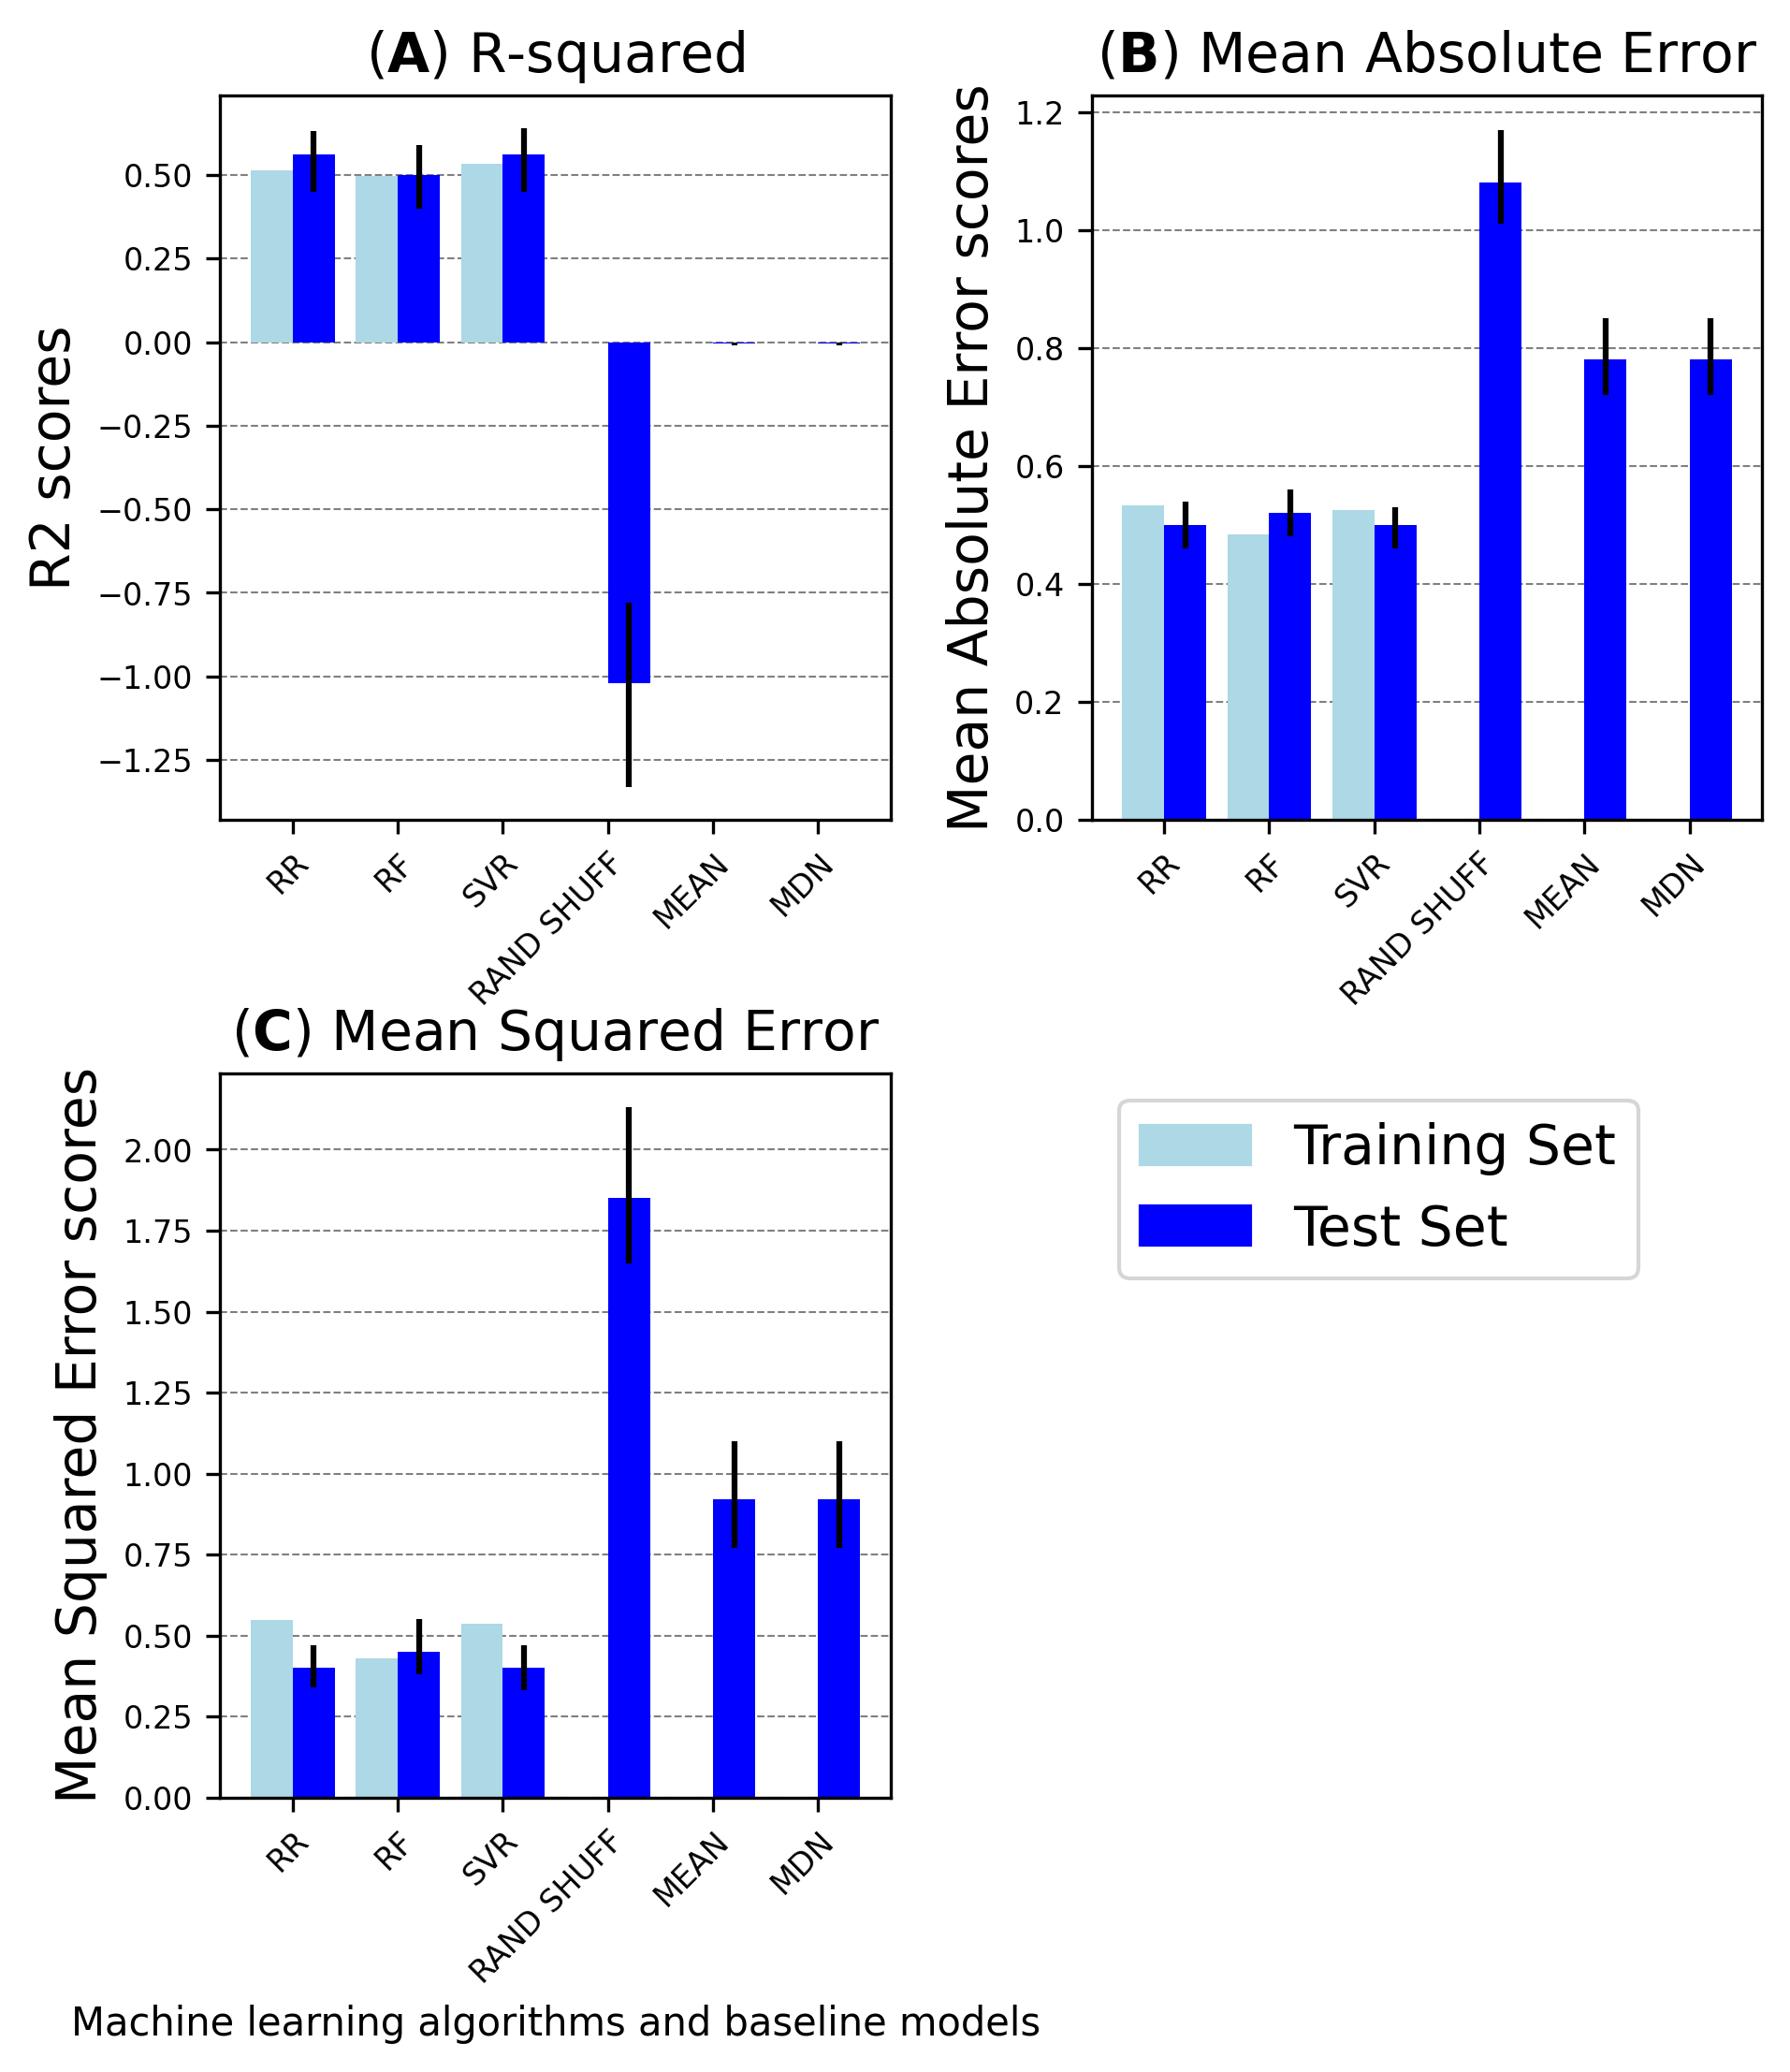

In [104]:
import matplotlib.patches as mpatches

# Colors
train_color = 'lightblue'
test_color = 'blue'

# Create legend handles
legend_handles = [
    mpatches.Patch(color=train_color, label='Training Set'),
    mpatches.Patch(color=test_color, label='Test Set')
]

ax3d = fig3.add_subplot(gs3[1, 1])

# Create legend
ax3d.legend(handles=legend_handles, loc='upper left')

# Hide the axes to show only the legend
ax3d.axis('off')

# Show the plot
# plt.show()
# fig3.savefig("your_path/Fig3abc.jpg", pad_inches=0.1, bbox_inches="tight")

# fig3

### **Feature importance: Univariate models versus multivariate models**

In [105]:
# Load 'dataset.xlsx' file again as pandas DataFrame

# data = pd.read_excel("YOUR_PATH/dataset.xlsx", sheet_name=0, header=0)

In [106]:
# Assign the target 'BDEPRESSION' and each feature to separate variables
ADEPRESSION = data[['BDEPRESSION', 'ADEPRESSION']]
AANXIETY = data[['BDEPRESSION', 'AANXIETY']]
quarantinesubperiod = data[['BDEPRESSION', 'quarantinesubperiod']]
sex = data[['BDEPRESSION', 'sex']]
age = data[['BDEPRESSION', 'age']]
mentdishist = data[['BDEPRESSION', 'mentdishist']]
suic = data[['BDEPRESSION', 'suic']]

In [107]:
# Convert categorical features into dummy variables
quarantinesubperiod = pd.get_dummies(quarantinesubperiod, columns=['quarantinesubperiod'])
sex = pd.get_dummies(sex, columns=['sex'])
mentdishist = pd.get_dummies(mentdishist, columns=['mentdishist'])
suic = pd.get_dummies(suic, columns=['suic'])

# Run the following lines to check if the conversion was executed correctly:
print("'quarantinesubperiod' columns:\n{}".format(list(quarantinesubperiod.columns)))
print("\n'sex' columns:\n{}".format(list(sex.columns)))
print("\n'mentdishist' columns:\n{}".format(list(mentdishist.columns)))
print("\n'suic' columns:\n{}".format(list(suic.columns)))

'quarantinesubperiod' columns:
['BDEPRESSION', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third']

'sex' columns:
['BDEPRESSION', 'sex_man', 'sex_woman']

'mentdishist' columns:
['BDEPRESSION', 'mentdishist_no', 'mentdishist_yes']

'suic' columns:
['BDEPRESSION', 'suic_no', 'suic_yes']


In [108]:
print(quarantinesubperiod.dtypes)
print(sex.dtypes)
print(mentdishist.dtypes)
print(suic.dtypes)

BDEPRESSION                        int64
quarantinesubperiod_quar first      bool
quarantinesubperiod_quar second     bool
quarantinesubperiod_quar third      bool
dtype: object
BDEPRESSION    int64
sex_man         bool
sex_woman       bool
dtype: object
BDEPRESSION        int64
mentdishist_no      bool
mentdishist_yes     bool
dtype: object
BDEPRESSION    int64
suic_no         bool
suic_yes        bool
dtype: object


In [109]:
quarantinesubperiod = quarantinesubperiod.astype(int)
sex = sex.astype(int)
mentdishist = mentdishist.astype(int)
suic = suic.astype(int)
print(quarantinesubperiod.dtypes)
print(sex.dtypes)
print(mentdishist.dtypes)
print(suic.dtypes)

BDEPRESSION                        int32
quarantinesubperiod_quar first     int32
quarantinesubperiod_quar second    int32
quarantinesubperiod_quar third     int32
dtype: object
BDEPRESSION    int32
sex_man        int32
sex_woman      int32
dtype: object
BDEPRESSION        int32
mentdishist_no     int32
mentdishist_yes    int32
dtype: object
BDEPRESSION    int32
suic_no        int32
suic_yes       int32
dtype: object


In [110]:
ADEPRESSION = np.array(ADEPRESSION)
AANXIETY = np.array(AANXIETY)
quarantinesubperiod = np.array(quarantinesubperiod)
sex = np.array(sex)
age = np.array(age)
mentdishist = np.array(mentdishist)
suic = np.array(suic)

In [111]:
print(ADEPRESSION.dtype)
print(AANXIETY.dtype)
print(quarantinesubperiod.dtype)
print(sex.dtype)
print(mentdishist.dtype)
print(suic.dtype)

int64
int64
int32
int32
int32
int32


In [112]:
ADEPRESSION = ADEPRESSION.astype('int32')
AANXIETY = AANXIETY.astype('int32')

print(ADEPRESSION.dtype)
print(AANXIETY.dtype)
print(quarantinesubperiod.dtype)
print(sex.dtype)
print(mentdishist.dtype)
print(suic.dtype)

int32
int32
int32
int32
int32
int32


In [113]:
# Assign features to 'X' and target to 'y'
print("Shown below are the first five rows of each variable and their corresponding shape.")

# ADEPRESSION
ADEP_X = ADEPRESSION[:, 1:]
ADEP_y = ADEPRESSION[:, :1]

# Run the following lines to check 'ADEP_X' and 'ADEP_y':
print("\n'ADEP_X':\n", ADEP_X[0:5], ADEP_X.shape)
print("\n'ADEP_y':\n", ADEP_y[0:5], ADEP_y.shape)
##################################################

# AANXIETY
AANX_X = AANXIETY[:, 1:]
AANX_y = AANXIETY[:, :1]

# Run the following lines to check 'AANX_X' and 'AANX_y':
print("\n'AANX_X':\n", AANX_X[0:5], AANX_X.shape)
print("\n'AANX_y':\n", AANX_y[0:5], AANX_y.shape)
##################################################

# quarantinesubperiod
quar_X = quarantinesubperiod[:, 1:]
quar_y = quarantinesubperiod[:, :1]

# Run the following lines to check 'quar_X' and 'quar_y':
print("\n'quar_X':\n", quar_X[0:5], quar_X.shape)
print("\n'quar_y':\n", quar_y[0:5], quar_y.shape)
##################################################

# sex
sex_X = sex[:, 1:]
sex_y = sex[:, :1]

# Run the following lines to check 'sex_X' and 'sex_y':
print("\n'sex_X':\n", sex_X[0:5], sex_X.shape)
print("\n'sex_y':\n", sex_y[0:5], sex_y.shape)
##################################################

# age
age_X = age[:, 1:]
age_y = age[:, :1]

# Run the following lines to check 'age_X' and 'age_y':
print("\n'age_X':\n", age_X[0:5], age_X.shape)
print("\n'age_y':\n", age_y[0:5], age_y.shape)
##################################################

# mentdishist
ment_X = mentdishist[:, 1:]
ment_y = mentdishist[:, :1]

# Run the following lines to check 'ment_X' and 'ment_y':
print("\n'ment_X':\n", ment_X[0:5], ment_X.shape)
print("\n'ment_y':\n", ment_y[0:5], ment_y.shape)
##################################################

# suic
suic_X = suic[:, 1:]
suic_y = suic[:, :1]

# Run the following lines to check 'suic_X' and 'suic_y':
print("\n'suic_X':\n", suic_X[0:5], suic_X.shape)
print("\n'suic_y':\n", suic_y[0:5], suic_y.shape)

Shown below are the first five rows of each variable and their corresponding shape.

'ADEP_X':
 [[13]
 [16]
 [ 5]
 [28]
 [17]] (1492, 1)

'ADEP_y':
 [[ 1]
 [11]
 [11]
 [24]
 [17]] (1492, 1)

'AANX_X':
 [[33]
 [21]
 [20]
 [41]
 [37]] (1492, 1)

'AANX_y':
 [[ 1]
 [11]
 [11]
 [24]
 [17]] (1492, 1)

'quar_X':
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]] (1492, 3)

'quar_y':
 [[ 1]
 [11]
 [11]
 [24]
 [17]] (1492, 1)

'sex_X':
 [[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]] (1492, 2)

'sex_y':
 [[ 1]
 [11]
 [11]
 [24]
 [17]] (1492, 1)

'age_X':
 [[22]
 [24]
 [30]
 [22]
 [25]] (1492, 1)

'age_y':
 [[ 1]
 [11]
 [11]
 [24]
 [17]] (1492, 1)

'ment_X':
 [[1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]] (1492, 2)

'ment_y':
 [[ 1]
 [11]
 [11]
 [24]
 [17]] (1492, 1)

'suic_X':
 [[1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]] (1492, 2)

'suic_y':
 [[ 1]
 [11]
 [11]
 [24]
 [17]] (1492, 1)


In [114]:
# Split 'X' and 'y' into a training set and a test set

# 'ADEPRESSION' feature
ADEP_X_train, ADEP_X_test, ADEP_y_train, ADEP_y_test = train_test_split(
    ADEP_X, ADEP_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("'ADEPRESSION' training set - ", "features: {}; target: {}".format(ADEP_X_train.shape, ADEP_y_train.shape))
print("'ADEPRESSION' test set - ", "features: {}; target: {}".format(ADEP_X_test.shape, ADEP_y_test.shape))
####################################################################################################

# 'AANXIETY' feature
AANX_X_train, AANX_X_test, AANX_y_train, AANX_y_test = train_test_split(
    AANX_X, AANX_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'AANXIETY' training set - ", "features: {}; target: {}".format(AANX_X_train.shape, AANX_y_train.shape))
print("'AANXIETY' test set - ", "features: {}; target: {}".format(AANX_X_test.shape, AANX_y_test.shape))
####################################################################################################

# 'quarantinesubperiod' feature
quar_X_train, quar_X_test, quar_y_train, quar_y_test = train_test_split(
    quar_X, quar_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'quarantinesubperiod' training set - ", "features: {}; target: {}".format(quar_X_train.shape, quar_y_train.shape))
print("'quarantinesubperiod' test set - ", "features: {}; target: {}".format(quar_X_test.shape, quar_y_test.shape))
####################################################################################################

# 'sex' feature
sex_X_train, sex_X_test, sex_y_train, sex_y_test = train_test_split(
    sex_X, sex_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'sex' training set - ", "features: {}; target: {}".format(sex_X_train.shape, sex_y_train.shape))
print("'sex' test set - ", "features: {}; target: {}".format(sex_X_test.shape, sex_y_test.shape))
####################################################################################################

# 'age' feature
age_X_train, age_X_test, age_y_train, age_y_test = train_test_split(
    age_X, age_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'age' training set - ", "features: {}; target: {}".format(age_X_train.shape, age_y_train.shape))
print("'age' test set - ", "features: {}; target: {}".format(age_X_test.shape, age_y_test.shape))
####################################################################################################

# 'mentdishist' feature
ment_X_train, ment_X_test, ment_y_train, ment_y_test = train_test_split(
    ment_X, ment_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'mentdishist' training set - ", "features: {}; target: {}".format(ment_X_train.shape, ment_y_train.shape))
print("'mentdishist' test set - ", "features: {}; target: {}".format(ment_X_test.shape, ment_y_test.shape))
####################################################################################################

# 'suic' feature
suic_X_train, suic_X_test, suic_y_train, suic_y_test = train_test_split(
    suic_X, suic_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'suic' training set - ", "features: {}; target: {}".format(suic_X_train.shape, suic_y_train.shape))
print("'suic' test set - ", "features: {}; target: {}".format(suic_X_test.shape, suic_y_test.shape))

'ADEPRESSION' training set -  features: (1119, 1); target: (1119, 1)
'ADEPRESSION' test set -  features: (373, 1); target: (373, 1)

'AANXIETY' training set -  features: (1119, 1); target: (1119, 1)
'AANXIETY' test set -  features: (373, 1); target: (373, 1)

'quarantinesubperiod' training set -  features: (1119, 3); target: (1119, 1)
'quarantinesubperiod' test set -  features: (373, 3); target: (373, 1)

'sex' training set -  features: (1119, 2); target: (1119, 1)
'sex' test set -  features: (373, 2); target: (373, 1)

'age' training set -  features: (1119, 1); target: (1119, 1)
'age' test set -  features: (373, 1); target: (373, 1)

'mentdishist' training set -  features: (1119, 2); target: (1119, 1)
'mentdishist' test set -  features: (373, 2); target: (373, 1)

'suic' training set -  features: (1119, 2); target: (1119, 1)
'suic' test set -  features: (373, 2); target: (373, 1)


In [115]:
# Scale the features
print("Shown below are the first five rows of each variable and their corresponding shape.")

# 'ADEPRESSION'
qt_norm = QuantileTransformer(output_distribution='normal').fit(ADEP_X_train)
ADEP_X_train = qt_norm.transform(ADEP_X_train)
ADEP_X_test = qt_norm.transform(ADEP_X_test)

# Run the following lines to check 'ADEP_X_train' and 'ADEP_X_test':
print("'ADEP_X_train':\n", ADEP_X_train[0:5], ADEP_X_train.shape)
print("\n'ADEP_X_test':\n", ADEP_X_test[0:5], ADEP_X_test.shape)
################################################################################

# 'AANXIETY'
qt_norm = QuantileTransformer(output_distribution='normal').fit(AANX_X_train)
AANX_X_train = qt_norm.transform(AANX_X_train)
AANX_X_test = qt_norm.transform(AANX_X_test)

# Run the following lines to check 'AANX_X_train' and 'AANX_X_test':
print("\n'AANX_X_train':\n", AANX_X_train[0:5], AANX_X_train.shape)
print("\n'AANX_X_test':\n", AANX_X_test[0:5], AANX_X_test.shape)
################################################################################

# 'age'
qt_norm = QuantileTransformer(output_distribution='normal').fit(age_X_train)
age_X_train = qt_norm.transform(age_X_train)
age_X_test = qt_norm.transform(age_X_test)

# Run the following lines to check 'age_X_train' and 'age_X_test':
print("\n'age_X_train':\n", age_X_train[0:5], age_X_train.shape)
print("\n'age_X_test':\n", age_X_test[0:5], age_X_test.shape)

Shown below are the first five rows of each variable and their corresponding shape.
'ADEP_X_train':
 [[ 0.2200582 ]
 [-1.17940175]
 [ 0.90330062]
 [ 1.4568958 ]
 [ 0.2200582 ]] (1119, 1)

'ADEP_X_test':
 [[ 1.3041214 ]
 [-1.33101771]
 [ 0.77822491]
 [-0.62414474]
 [ 0.71359852]] (373, 1)

'AANX_X_train':
 [[ 0.2406714 ]
 [-1.36525737]
 [ 0.02007445]
 [ 0.09549215]
 [-0.18931001]] (1119, 1)

'AANX_X_test':
 [[ 0.72987685]
 [-1.06188413]
 [ 0.53653104]
 [-1.60221032]
 [ 0.2406714 ]] (373, 1)

'age_X_train':
 [[-1.77392186]
 [ 0.74635093]
 [-1.77392186]
 [ 0.2239158 ]
 [ 0.74635093]] (1119, 1)

'age_X_test':
 [[-1.17188995]
 [-0.74800946]
 [ 0.74635093]
 [ 0.74635093]
 [ 1.56698962]] (373, 1)


**RIDGE REGRESSION**


In [116]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import numpy as np

# Set alpha for Ridge regression
alpha = 100

# Ridge regression
# Obtain the univariate scores
ADEP_RR_score = []
AANX_RR_score = []
quar_RR_score = []
sex_RR_score = []
age_RR_score = []
ment_RR_score = []
suic_RR_score = []

# 'ADEPRESSION'
ADEP_RR = Ridge(alpha=alpha).fit(ADEP_X_train, np.ravel(ADEP_y_train)) #np.ravel(ADEP_y_train)

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_pred = ADEP_RR.predict(ADEP_X_test_resampled)
    ADEP_RR_score.append(r2_score(ADEP_y_test_resampled, ADEP_y_pred))

# 'AANXIETY'
AANX_RR = Ridge(alpha=alpha).fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_pred = AANX_RR.predict(AANX_X_test_resampled)
    AANX_RR_score.append(r2_score(AANX_y_test_resampled, AANX_y_pred))

# 'quarantinesubperiod'
quar_RR = Ridge(alpha=alpha).fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_pred = quar_RR.predict(quar_X_test_resampled)
    quar_RR_score.append(r2_score(quar_y_test_resampled, quar_y_pred)) 

# 'sex'
sex_RR = Ridge(alpha=alpha).fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_pred = sex_RR.predict(sex_X_test_resampled)
    sex_RR_score.append(r2_score(sex_y_test_resampled, sex_y_pred)) 

# 'age'
age_RR = Ridge(alpha=alpha).fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_pred = age_RR.predict(age_X_test_resampled)
    age_RR_score.append(r2_score(age_y_test_resampled, age_y_pred)) 

# 'mentdishist'
ment_RR = Ridge(alpha=alpha).fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_pred = ment_RR.predict(ment_X_test_resampled)
    ment_RR_score.append(r2_score(ment_y_test_resampled, ment_y_pred))

# 'suic'
suic_RR = Ridge(alpha=alpha).fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_pred = suic_RR.predict(suic_X_test_resampled)
    suic_RR_score.append(r2_score(suic_y_test_resampled, suic_y_pred))

print("Mean univariate scores for Ridge regression model with alpha=100 and 95% confidence intervals:")
print("    'ADEPRESSION' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_RR_score), np.percentile(ADEP_RR_score, 2.5), np.percentile(ADEP_RR_score, 97.5)))
print("    'AANXIETY' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_RR_score), np.percentile(AANX_RR_score, 2.5), np.percentile(AANX_RR_score, 97.5)))
print("    'quarantinesubperiod' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_RR_score), np.percentile(quar_RR_score, 2.5), np.percentile(quar_RR_score, 97.5)))
print("    'sex' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_RR_score), np.percentile(sex_RR_score, 2.5), np.percentile(sex_RR_score, 97.5)))
print("    'age' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_RR_score), np.percentile(age_RR_score, 2.5), np.percentile(age_RR_score, 97.5)))
print("    'mentdishist' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_RR_score), np.percentile(ment_RR_score, 2.5), np.percentile(ment_RR_score, 97.5)))
print("    'suic' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_RR_score), np.percentile(suic_RR_score, 2.5), np.percentile(suic_RR_score, 97.5)))

Mean univariate scores for Ridge regression model with alpha=100 and 95% confidence intervals:
    'ADEPRESSION' R2 score: 0.48 [0.40, 0.56]
    'AANXIETY' R2 score: 0.40 [0.32, 0.47]
    'quarantinesubperiod' R2 score: -0.00 [-0.02, 0.00]
    'sex' R2 score: 0.01 [-0.01, 0.02]
    'age' R2 score: 0.03 [0.00, 0.05]
    'mentdishist' R2 score: 0.03 [-0.01, 0.07]
    'suic' R2 score: 0.13 [0.07, 0.19]


In [117]:
# Prepare the inputs for the plot
scores = [r2_ridge, ADEP_RR_score, AANX_RR_score, quar_RR_score, sex_RR_score, age_RR_score, ment_RR_score, suic_RR_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

In [118]:
# Check that the mean univariate scores are correct 
mean_scores

[0.557805510065108,
 0.47760910110545984,
 0.3981720867276783,
 -0.002216421099073704,
 0.008110120395308826,
 0.028792983032782965,
 0.03254888076694474,
 0.1290731158610989]

In [119]:
mpl.rcdefaults()
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams["xtick.labelsize"] = 8
mpl.rcParams["ytick.labelsize"] = 8
mpl.rcParams["legend.fontsize"] = 14
# errorbar.capsize
fig5 = plt.figure(layout='tight', figsize=(18*cm, 18*cm))

gs5 = fig5.add_gridspec(2, 2, **{"wspace":  0.3, "hspace": 0.35})

<Figure size 2125.98x2125.98 with 0 Axes>

In [120]:
import matplotlib.pyplot as plt

# Generate the plot
ax5a = fig5.add_subplot(gs5[0, 0])

# Plot bars with error bars
# plt.bar(models, mean_scores, yerr=ci, capsize=5, alpha=0.7, label='Mean R-squared scores', color='skyblue')
ax5a.bar(models, mean_scores, yerr=ci, capsize=5, alpha=0.7, color='blue', error_kw=dict(lw=0.8, capthick=0.5))

# Add a grid for better readability
ax5a.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the title and axis labels
ax5a.set_title('($\\bf{A}$) Ridge Regression')
# plt.xlabel('Multivariate and univariate models', size=18, labelpad=10.0)
ax5a.set_ylabel('Mean R-squared scores')

# Rotate x-axis labels for better visibility
xlabels = ax5a.get_xticklabels()
xticks = ax5a.get_xticks()
_ = ax5a.set_xticks(xticks, xlabels, rotation=45, ha='right', rotation_mode='anchor')

# Add a legend to the plot
# plt.legend(loc='upper right')

# Show the plot
# plt.tight_layout()  # Ensures all labels are visible
# plt.show()

#### Random forest regressor

In [121]:
# Obtain the univariate scores
ADEP_RF_score = []
AANX_RF_score = []
quar_RF_score = []
sex_RF_score = []
age_RF_score = []
ment_RF_score = []
suic_RF_score = []

# 'ADEPRESSION'
ADEP_RF = gs_RF.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train)) #np.ravel(ADEP_y_train)

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_pred = ADEP_RF.predict(ADEP_X_test_resampled)
    ADEP_RF_score.append(r2_score(ADEP_y_test_resampled, ADEP_y_pred))

# 'AANXIETY'
AANX_RF = gs_RF.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_pred = AANX_RF.predict(AANX_X_test_resampled)
    AANX_RF_score.append(r2_score(AANX_y_test_resampled, AANX_y_pred))

# 'quarantinesubperiod'
quar_RF = gs_RF.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_pred = quar_RF.predict(quar_X_test_resampled)
    quar_RF_score.append(r2_score(quar_y_test_resampled, quar_y_pred)) 

# 'sex'
sex_RF = gs_RF.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_pred = sex_RF.predict(sex_X_test_resampled)
    sex_RF_score.append(r2_score(sex_y_test_resampled, sex_y_pred)) 

# 'age'
age_RF = gs_RF.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_pred = age_RF.predict(age_X_test_resampled)
    age_RF_score.append(r2_score(age_y_test_resampled, age_y_pred)) 

# 'mentdishist'
ment_RF = gs_RF.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_pred = ment_RF.predict(ment_X_test_resampled)
    ment_RF_score.append(r2_score(ment_y_test_resampled, ment_y_pred))

# 'suic'
suic_RF = gs_RF.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_pred = suic_RF.predict(suic_X_test_resampled)
    suic_RF_score.append(r2_score(suic_y_test_resampled, suic_y_pred))

print("Mean univariate scores for random forest regressor with 95% confidence intervals:")
print("    'ADEPRESSION' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_RF_score), np.percentile(ADEP_RF_score, 2.5), np.percentile(ADEP_RF_score, 97.5)))
print("    'AANXIETY' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_RF_score), np.percentile(AANX_RF_score, 2.5), np.percentile(AANX_RF_score, 97.5)))
print("    'quarantinesubperiod' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_RF_score), np.percentile(quar_RF_score, 2.5), np.percentile(quar_RF_score, 97.5)))
print("    'sex' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_RF_score), np.percentile(sex_RF_score, 2.5), np.percentile(sex_RF_score, 97.5)))
print("    'age' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_RF_score), np.percentile(age_RF_score, 2.5), np.percentile(age_RF_score, 97.5)))
print("    'mentdishist' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_RF_score), np.percentile(ment_RF_score, 2.5), np.percentile(ment_RF_score, 97.5)))
print("    'suic' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_RF_score), np.percentile(suic_RF_score, 2.5), np.percentile(suic_RF_score, 97.5)))

Mean univariate scores for random forest regressor with 95% confidence intervals:
    'ADEPRESSION' R2 score: 0.46 [0.31, 0.58]
    'AANXIETY' R2 score: 0.37 [0.25, 0.46]
    'quarantinesubperiod' R2 score: -0.00 [-0.02, 0.00]
    'sex' R2 score: 0.01 [-0.02, 0.03]
    'age' R2 score: 0.02 [-0.01, 0.04]
    'mentdishist' R2 score: 0.03 [-0.02, 0.07]
    'suic' R2 score: 0.13 [0.07, 0.20]


In [122]:
# Prepare the inputs for the plot
scores = [r2_RF, ADEP_RF_score, AANX_RF_score, quar_RF_score, sex_RF_score, age_RF_score, ment_RF_score, suic_RF_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

In [123]:
# Check that the mean univariate scores are correct 
mean_scores

[0.503591876573733,
 0.45781853416000085,
 0.3705963568507747,
 -0.0016878208614330347,
 0.00884498677333736,
 0.021025686371459566,
 0.028295499532669282,
 0.13346142011251796]

In [124]:
# import matplotlib.pyplot as plt

# Generate the plot
ax5b = fig5.add_subplot(gs5[0, 1])

# Plot bars with error bars
# plt.bar(models, mean_scores, yerr=ci, capsize=5, alpha=0.7, label='Mean R-squared scores', color='skyblue')
ax5b.bar(models, mean_scores, yerr=ci, capsize=5, alpha=0.7, color='blue', error_kw=dict(lw=0.8, capthick=0.5))

# Add a grid for better readability
ax5b.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the title and axis labels
ax5b.set_title('($\\bf{B}$) Random Forest Regressor')
# plt.xlabel('Multivariate and univariate models', size=18, labelpad=10.0)
ax5b.set_ylabel('Mean R-squared scores')

# Rotate x-axis labels for better visibility
xlabels = ax5b.get_xticklabels()
xticks = ax5b.get_xticks()
_ = ax5b.set_xticks(xticks, xlabels, rotation=45, ha='right', rotation_mode='anchor')
# Add a legend to the plot
# plt.legend(loc='upper right')

# Show the plot
# plt.tight_layout()  # Ensures all labels are visible
# plt.show()

#### Support vector regressor (SVR)

In [125]:
# Obtain the univariate scores
ADEP_SVR_score = []
AANX_SVR_score = []
quar_SVR_score = []
sex_SVR_score = []
age_SVR_score = []
ment_SVR_score = []
suic_SVR_score = []

# 'ADEPRESSION'
ADEP_SVR = gs_SVR.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train)) #np.ravel(ADEP_y_train)

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_pred = ADEP_SVR.predict(ADEP_X_test_resampled)
    ADEP_SVR_score.append(r2_score(ADEP_y_test_resampled, ADEP_y_pred))

# 'AANXIETY'
AANX_SVR = gs_SVR.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_pred = AANX_SVR.predict(AANX_X_test_resampled)
    AANX_SVR_score.append(r2_score(AANX_y_test_resampled, AANX_y_pred))

# 'quarantinesubperiod'
quar_SVR = gs_SVR.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_pred = quar_SVR.predict(quar_X_test_resampled)
    quar_SVR_score.append(r2_score(quar_y_test_resampled, quar_y_pred)) 

# 'sex'
sex_SVR = gs_SVR.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_pred = sex_SVR.predict(sex_X_test_resampled)
    sex_SVR_score.append(r2_score(sex_y_test_resampled, sex_y_pred)) 

# 'age'
age_SVR = gs_SVR.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_pred = age_SVR.predict(age_X_test_resampled)
    age_SVR_score.append(r2_score(age_y_test_resampled, age_y_pred)) 

# 'mentdishist'
ment_SVR = gs_SVR.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_pred = ment_SVR.predict(ment_X_test_resampled)
    ment_SVR_score.append(r2_score(ment_y_test_resampled, ment_y_pred))

# 'suic'
suic_SVR = gs_SVR.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_pred = suic_SVR.predict(suic_X_test_resampled)
    suic_SVR_score.append(r2_score(suic_y_test_resampled, suic_y_pred))

print("Mean univariate scores for SVR with 95% confidence intervals:")
print("    'ADEPRESSION' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_SVR_score), np.percentile(ADEP_SVR_score, 2.5), np.percentile(ADEP_SVR_score, 97.5)))
print("    'AANXIETY' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_SVR_score), np.percentile(AANX_SVR_score, 2.5), np.percentile(AANX_SVR_score, 97.5)))
print("    'quarantinesubperiod' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_SVR_score), np.percentile(quar_SVR_score, 2.5), np.percentile(quar_SVR_score, 97.5)))
print("    'sex' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_SVR_score), np.percentile(sex_SVR_score, 2.5), np.percentile(sex_SVR_score, 97.5)))
print("    'age' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_SVR_score), np.percentile(age_SVR_score, 2.5), np.percentile(age_SVR_score, 97.5)))
print("    'mentdishist' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_SVR_score), np.percentile(ment_SVR_score, 2.5), np.percentile(ment_SVR_score, 97.5)))
print("    'suic' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_SVR_score), np.percentile(suic_SVR_score, 2.5), np.percentile(suic_SVR_score, 97.5)))

Mean univariate scores for SVR with 95% confidence intervals:
    'ADEPRESSION' R2 score: 0.33 [0.29, 0.38]
    'AANXIETY' R2 score: 0.27 [0.22, 0.32]
    'quarantinesubperiod' R2 score: -0.04 [-0.08, -0.01]
    'sex' R2 score: -0.03 [-0.08, -0.01]
    'age' R2 score: -0.01 [-0.05, 0.01]
    'mentdishist' R2 score: -0.01 [-0.06, 0.01]
    'suic' R2 score: 0.02 [-0.02, 0.05]


In [126]:
# Prepare the inputs for the plot
scores = [r2_SVR, ADEP_SVR_score, AANX_SVR_score, quar_SVR_score, sex_SVR_score, age_SVR_score, ment_SVR_score, suic_SVR_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

In [127]:
# Check that the mean univariate scores are correct 
mean_scores

[0.5593089712482014,
 0.3328570703114591,
 0.27243745729969737,
 -0.04244610468531262,
 -0.03471572729595873,
 -0.014152038973292978,
 -0.014138647124962251,
 0.01996507030590437]

In [128]:
# import matplotlib.pyplot as plt

# Generate the plot
ax5c = fig5.add_subplot(gs5[1, 0])

# Plot bars with error bars
# plt.bar(models, mean_scores, yerr=ci, capsize=5, alpha=0.7, label='Mean R-squared scores', color='skyblue')
ax5c.bar(models, mean_scores, yerr=ci, capsize=5, alpha=0.7, color='blue', error_kw=dict(lw=0.8, capthick=0.5))

# Add a grid for better readability
ax5c.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the title and axis labels
ax5c.set_title('($\\bf{C}$) Support Vector Regressor')
ax5c.set_xlabel('Multivariate and univariate models', labelpad=10.0)
ax5c.set_ylabel('Mean R-squared scores')

# Rotate x-axis labels for better visibility
xlabels = ax5c.get_xticklabels()
xticks = ax5c.get_xticks()
_ = ax5c.set_xticks(xticks, xlabels, rotation=45, ha='right', rotation_mode='anchor')
# Add a legend to the plot
# plt.legend(loc='upper right')

# Show the plot
# plt.tight_layout()  # Ensures all labels are visible
# plt.show()

C:\Users\stein\AppData\Local\Temp\ipykernel_34348\2786704064.py:1: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

C:\Users\stein\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



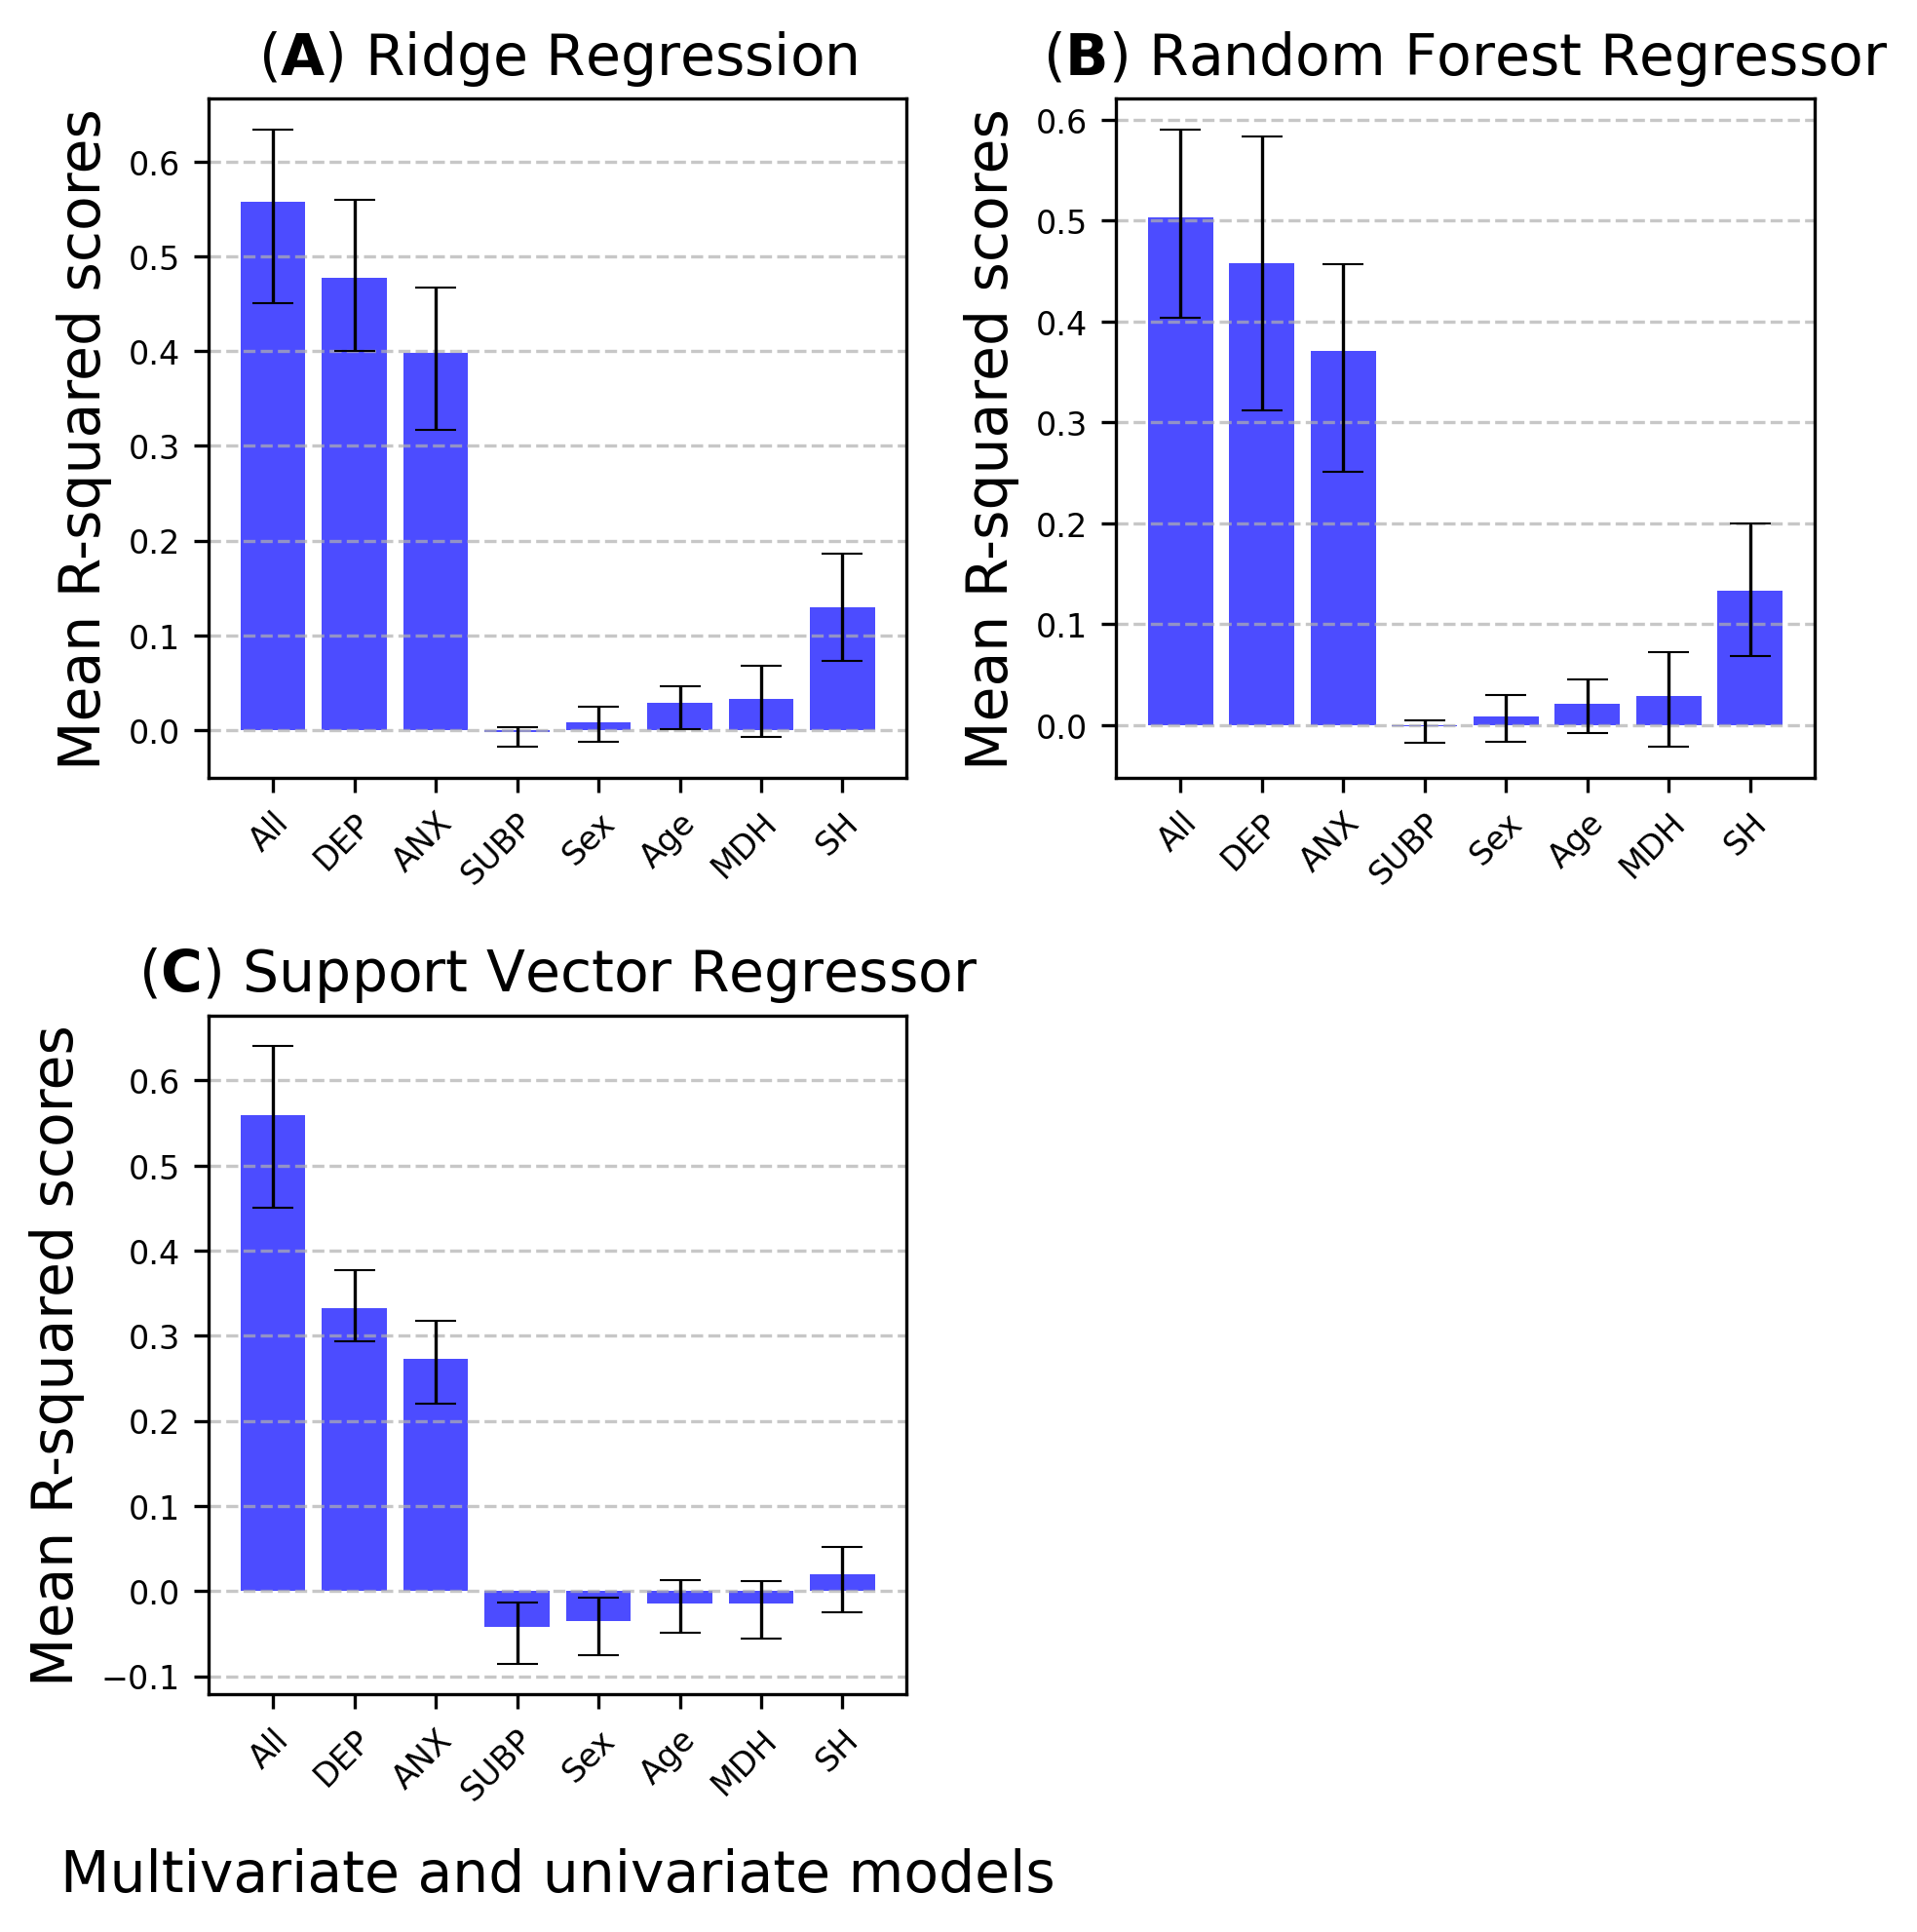

In [129]:
# fig5.savefig("your_path/Fig5abc.jpg", pad_inches=0.1, bbox_inches="tight")
# fig5